# HDB resale flat prices  
  
Objective: To build a model that can predict prices in  5 - 10 years time, and find out what are the key factors driving house resale prices.

<b>Content:</b>  
1. Load Data  
  
2. Feature Engineering  
    
<b>Models used:</b>   
3. Elastic Net Regression (Linear approach)  
  
4. Random Forest Regressor (Tree based approach)
  
5. Time Series Analysis and Predictions 

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

### 1. Load Data

In [25]:
data = pd.read_csv('./data/adjusted_data.csv')

In [26]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,date,year,gdp_per_capita
0,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,63,340551.0,2012-01-01,2012,54431
1,1,ANG MO KIO,4 ROOM,304,ANG MO KIO AVE 1,10 TO 12,97.0,NEW GENERATION,1977,64,472231.0,2012-01-01,2012,54431
2,1,ANG MO KIO,5 ROOM,306,ANG MO KIO AVE 1,01 TO 03,123.0,STANDARD,1977,64,508556.0,2012-01-01,2012,54431
3,1,ANG MO KIO,3 ROOM,332,ANG MO KIO AVE 1,10 TO 12,68.0,NEW GENERATION,1981,68,317848.0,2012-01-01,2012,54431
4,1,ANG MO KIO,4 ROOM,336,ANG MO KIO AVE 1,07 TO 09,91.0,NEW GENERATION,1982,69,435905.0,2012-01-01,2012,54431
5,1,ANG MO KIO,4 ROOM,335,ANG MO KIO AVE 1,01 TO 03,91.0,NEW GENERATION,1982,69,417743.0,2012-01-01,2012,54431
6,1,ANG MO KIO,3 ROOM,418,ANG MO KIO AVE 10,04 TO 06,89.0,NEW GENERATION,1979,66,381417.0,2012-01-01,2012,54431
7,1,ANG MO KIO,3 ROOM,440,ANG MO KIO AVE 10,10 TO 12,67.0,NEW GENERATION,1979,66,313307.0,2012-01-01,2012,54431
8,1,ANG MO KIO,3 ROOM,432,ANG MO KIO AVE 10,07 TO 09,82.0,NEW GENERATION,1979,66,336010.0,2012-01-01,2012,54431
9,1,ANG MO KIO,4 ROOM,470,ANG MO KIO AVE 10,04 TO 06,92.0,NEW GENERATION,1979,66,395039.0,2012-01-01,2012,54431


### 2. Feature Engineering

In [27]:
#date and year will be dropped. Since the goal is to predict sales, predicting based on year of the sales is meaningless.
#block and street name will also be dropped
df = data.drop(['block','street_name','date','year'], axis=1)

#Changing storey_range into ordinal features in ranges of 10 (1 - 9 will be 10, 10 to 19 will be 20 and so on.)
df['storey_range'] = df['storey_range'].apply(lambda x : (int(x[0])+1)*10)

#Month is a categorical variable
df['month'] = df['month'].astype(str)

#Getting dummies for categorical virables
df = pd.get_dummies(df, drop_first=True)

In [28]:
df.columns

Index(['storey_range', 'floor_area_sqm', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'gdp_per_capita', 'month_10',
       'month_11', 'month_12', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG',
       'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
       'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI-GENERATION', 'flat_model_ADJOINED FLAT',
       'flat_model_APARTMENT', 'flat_model_DBSS', '

In [29]:
df.shape

(130883, 67)

### 3. Linear Model

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet, ElasticNetCV, LassoCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [8]:
def eval_linear_model(model, X_train, y_train, X_test, y_test, cv=5):
    
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print("Cross-validated scores for train set:", scores)
    print("Mean cross-validated score:", scores.mean())
    
    #Fitting the model
    model = model.fit(X_train, y_train)
    print("R^2 Score for the test set:", model.score(X_test, y_test))
    
    '''
    #Predictions on the test dataset
    y_pred = pd.DataFrame(model.predict(X_test))  
    scatter = pd.DataFrame(list(zip(y_test,y_pred)),columns=['Actual Resales Price','Predicted Resales Price'])
    sns.scatterplot(x = 'Actual Resales Price', y = 'Predicted Resales Price', data = scatter)
    '''
            
    return model

In [9]:
#Defining function for getting important features
def impt_feat(coef, X_test):
    return pd.Series(coef, index=X_test.columns).sort_values(ascending=False)

In [30]:
#Defining train-test split
X = df.drop('resale_price',axis=1)
y = df['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [21]:
#Establish basline model
y_pred = [y_train.mean() for n in range(len(y_test))]
print('Baseline model R2 score is:', r2_score(y_test,y_pred))
#Using the mean value for the train set as baseline yields a negative score for test set. This indicates the mean of both 
#datasets are very different. 

Baseline model R2 score is: -8.070948488136942e-05


In [11]:
#Scaling X
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\yitaris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [12]:
enet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=500, cv=10, normalize=True, n_jobs=-1, verbose=2)
enmodel = enet.fit(Xs_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Path: 000 out of 500
Path: 000 out of 500
Path: 001 out of 500
Path: 001 out of 500Path: 000 out of 500
Path: 000 out of 500Path: 002 out of 500Path: 000 out of 500


Path: 000 out of 500
Path: 000 out of 500
Path: 001 out of 500
Path: 003 out of 500Path: 002 out of 500


Path: 000 out of 500Path: 001 out of 500Path: 001 out of 500Path: 001 out of 500

Path: 002 out of 500
Path: 001 out of 500


Path: 004 out of 500Path: 001 out of 500Path: 003 out of 500

Path: 002 out of 500Path: 002 out of 500


Path: 002 out of 500
Path: 003 out of 500Path: 005 out of 500Path: 002 out of 500Path: 004 out of 500


Path: 002 out of 500

Path: 003 out of 500
Path: 003 out of 500Path: 003 out of 500

Path: 006 out of 500Path: 003 out of 500

Path: 003 out of 500
Path: 004 out of 500
Path: 004 out of 500Path: 004 out of 500Path: 004 out of 500Path: 004 out of 500Path: 005 out of 500



Path: 007 out of 500

Path: 004 out of 500
Path: 005 out of 500Path: 005 out of 500Path: 005 out of 500

Path: 005 out 



Path: 075 out of 500Path: 069 out of 500
Path: 074 out of 500

Path: 074 out of 500Path: 069 out of 500Path: 067 out of 500


Path: 076 out of 500Path: 075 out of 500

Path: 070 out of 500Path: 075 out of 500Path: 076 out of 500Path: 070 out of 500Path: 068 out of 500




Path: 075 out of 500
Path: 076 out of 500Path: 077 out of 500

Path: 077 out of 500Path: 076 out of 500

Path: 071 out of 500Path: 069 out of 500Path: 071 out of 500
Path: 076 out of 500


Path: 078 out of 500Path: 078 out of 500

Path: 072 out of 500Path: 077 out of 500
Path: 070 out of 500
Path: 077 out of 500
Path: 072 out of 500

Path: 079 out of 500Path: 079 out of 500Path: 077 out of 500
Path: 073 out of 500


Path: 078 out of 500Path: 073 out of 500Path: 078 out of 500


Path: 080 out of 500Path: 071 out of 500Path: 078 out of 500Path: 080 out of 500Path: 074 out of 500
Path: 079 out of 500




Path: 079 out of 500Path: 081 out of 500

Path: 072 out of 500Path: 081 out of 500Path: 074 out of 500Path: 080 out 

Path: 123 out of 500Path: 132 out of 500
Path: 131 out of 500

Path: 126 out of 500Path: 133 out of 500Path: 133 out of 500Path: 131 out of 500

Path: 124 out of 500
Path: 132 out of 500Path: 127 out of 500


Path: 133 out of 500

Path: 134 out of 500Path: 132 out of 500

Path: 133 out of 500
Path: 125 out of 500Path: 128 out of 500Path: 134 out of 500Path: 135 out of 500

Path: 134 out of 500
Path: 127 out of 500


Path: 133 out of 500
Path: 129 out of 500Path: 134 out of 500Path: 135 out of 500


Path: 136 out of 500
Path: 126 out of 500Path: 135 out of 500Path: 128 out of 500Path: 134 out of 500
Path: 130 out of 500


Path: 137 out of 500
Path: 136 out of 500

Path: 135 out of 500Path: 129 out of 500
Path: 136 out of 500

Path: 131 out of 500
Path: 135 out of 500Path: 138 out of 500Path: 127 out of 500
Path: 137 out of 500
Path: 136 out of 500


Path: 137 out of 500
Path: 130 out of 500Path: 136 out of 500Path: 139 out of 500Path: 138 out of 500
Path: 138 out of 500Path: 137 out of 


Path: 178 out of 500Path: 185 out of 500Path: 186 out of 500Path: 183 out of 500



Path: 188 out of 500
Path: 178 out of 500Path: 189 out of 500Path: 184 out of 500
Path: 190 out of 500


Path: 179 out of 500Path: 187 out of 500Path: 186 out of 500


Path: 189 out of 500Path: 179 out of 500Path: 185 out of 500

Path: 190 out of 500
Path: 180 out of 500
Path: 187 out of 500Path: 180 out of 500
Path: 188 out of 500Path: 190 out of 500



Path: 191 out of 500Path: 191 out of 500Path: 186 out of 500


Path: 191 out of 500Path: 188 out of 500Path: 189 out of 500Path: 181 out of 500



Path: 181 out of 500Path: 192 out of 500Path: 192 out of 500


Path: 189 out of 500Path: 192 out of 500
Path: 187 out of 500Path: 182 out of 500Path: 190 out of 500


Path: 193 out of 500
Path: 182 out of 500Path: 193 out of 500


Path: 193 out of 500
Path: 183 out of 500Path: 190 out of 500Path: 191 out of 500Path: 188 out of 500

Path: 183 out of 500

Path: 194 out of 500
Path: 194 out of 500Path: 194 out 

Path: 244 out of 500Path: 250 out of 500Path: 247 out of 500Path: 247 out of 500

Path: 247 out of 500
Path: 235 out of 500


Path: 246 out of 500Path: 240 out of 500

Path: 245 out of 500Path: 248 out of 500

Path: 248 out of 500Path: 251 out of 500Path: 248 out of 500Path: 236 out of 500



Path: 246 out of 500Path: 252 out of 500Path: 241 out of 500
Path: 237 out of 500Path: 249 out of 500Path: 249 out of 500Path: 247 out of 500Path: 249 out of 500






Path: 250 out of 500Path: 250 out of 500Path: 253 out of 500

Path: 248 out of 500Path: 242 out of 500
Path: 238 out of 500


Path: 250 out of 500
Path: 251 out of 500Path: 251 out of 500Path: 254 out of 500

Path: 247 out of 500

Path: 243 out of 500
Path: 251 out of 500Path: 249 out of 500Path: 239 out of 500
Path: 252 out of 500
Path: 252 out of 500


Path: 255 out of 500
Path: 250 out of 500Path: 244 out of 500Path: 240 out of 500Path: 248 out of 500
Path: 252 out of 500Path: 253 out of 500




Path: 256 out of 500Path: 253 out 

Path: 296 out of 500

Path: 298 out of 500Path: 287 out of 500Path: 303 out of 500Path: 305 out of 500



Path: 302 out of 500Path: 296 out of 500
Path: 297 out of 500
Path: 288 out of 500

Path: 306 out of 500Path: 305 out of 500

Path: 299 out of 500Path: 304 out of 500
Path: 298 out of 500

Path: 307 out of 500Path: 297 out of 500Path: 289 out of 500Path: 303 out of 500



Path: 300 out of 500Path: 306 out of 500
Path: 298 out of 500Path: 299 out of 500
Path: 305 out of 500
Path: 308 out of 500


Path: 290 out of 500Path: 301 out of 500Path: 307 out of 500

Path: 304 out of 500

Path: 299 out of 500Path: 306 out of 500Path: 300 out of 500
Path: 309 out of 500


Path: 308 out of 500
Path: 302 out of 500
Path: 291 out of 500Path: 300 out of 500Path: 305 out of 500Path: 307 out of 500



Path: 309 out of 500Path: 301 out of 500
Path: 303 out of 500
Path: 310 out of 500
Path: 306 out of 500

Path: 301 out of 500Path: 311 out of 500Path: 308 out of 500Path: 304 out of 500Path: 302 out of

Path: 349 out of 500Path: 356 out of 500

Path: 352 out of 500Path: 363 out of 500Path: 361 out of 500


Path: 357 out of 500Path: 357 out of 500
Path: 354 out of 500Path: 350 out of 500
Path: 343 out of 500


Path: 362 out of 500
Path: 358 out of 500Path: 353 out of 500Path: 358 out of 500


Path: 344 out of 500Path: 351 out of 500
Path: 355 out of 500Path: 364 out of 500


Path: 359 out of 500Path: 359 out of 500Path: 354 out of 500Path: 363 out of 500


Path: 365 out of 500
Path: 345 out of 500Path: 352 out of 500


Path: 356 out of 500Path: 364 out of 500
Path: 360 out of 500

Path: 355 out of 500
Path: 360 out of 500Path: 346 out of 500Path: 353 out of 500Path: 366 out of 500
Path: 357 out of 500


Path: 365 out of 500

Path: 356 out of 500Path: 361 out of 500
Path: 361 out of 500Path: 347 out of 500

Path: 367 out of 500Path: 366 out of 500Path: 354 out of 500



Path: 362 out of 500Path: 348 out of 500Path: 358 out of 500


Path: 362 out of 500Path: 368 out of 500
Path: 367 out 

Path: 410 out of 500Path: 406 out of 500Path: 413 out of 500Path: 417 out of 500

Path: 409 out of 500


Path: 399 out of 500
Path: 423 out of 500Path: 414 out of 500Path: 411 out of 500


Path: 418 out of 500
Path: 423 out of 500Path: 407 out of 500
Path: 410 out of 500Path: 400 out of 500
Path: 415 out of 500Path: 412 out of 500



Path: 419 out of 500
Path: 424 out of 500Path: 424 out of 500Path: 411 out of 500Path: 416 out of 500


Path: 408 out of 500
Path: 413 out of 500

Path: 401 out of 500
Path: 420 out of 500Path: 425 out of 500Path: 417 out of 500
Path: 425 out of 500


Path: 412 out of 500Path: 409 out of 500Path: 402 out of 500


Path: 414 out of 500Path: 421 out of 500
Path: 418 out of 500Path: 403 out of 500

Path: 426 out of 500Path: 426 out of 500

Path: 413 out of 500Path: 415 out of 500

Path: 410 out of 500
Path: 404 out of 500

Path: 419 out of 500
Path: 422 out of 500Path: 416 out of 500Path: 427 out of 500Path: 427 out of 500



Path: 420 out of 500Path: 411 out 


Path: 476 out of 500Path: 483 out of 500
Path: 483 out of 500Path: 462 out of 500


Path: 478 out of 500

Path: 469 out of 500Path: 477 out of 500Path: 484 out of 500
Path: 472 out of 500Path: 464 out of 500

Path: 484 out of 500

Path: 479 out of 500Path: 463 out of 500


Path: 485 out of 500Path: 473 out of 500
Path: 465 out of 500Path: 470 out of 500Path: 485 out of 500
Path: 478 out of 500



Path: 480 out of 500
Path: 464 out of 500Path: 474 out of 500Path: 466 out of 500Path: 486 out of 500

Path: 479 out of 500

Path: 471 out of 500

Path: 486 out of 500
Path: 481 out of 500Path: 475 out of 500
Path: 472 out of 500Path: 467 out of 500

Path: 487 out of 500
Path: 487 out of 500

Path: 465 out of 500
Path: 473 out of 500Path: 482 out of 500Path: 480 out of 500

Path: 488 out of 500Path: 488 out of 500Path: 468 out of 500Path: 476 out of 500



Path: 466 out of 500

Path: 481 out of 500Path: 474 out of 500
Path: 467 out of 500
Path: 477 out of 500
Path: 483 out of 500Path: 489 out

Path: 045 out of 500
Path: 002 out of 500Path: 048 out of 500
Path: 039 out of 500

Path: 046 out of 500Path: 028 out of 500Path: 040 out of 500


Path: 003 out of 500
Path: 040 out of 500Path: 049 out of 500
Path: 029 out of 500Path: 047 out of 500
Path: 041 out of 500


Path: 004 out of 500Path: 030 out of 500

Path: 050 out of 500Path: 048 out of 500Path: 042 out of 500


Path: 041 out of 500
Path: 005 out of 500
Path: 043 out of 500
Path: 031 out of 500Path: 049 out of 500Path: 042 out of 500

Path: 006 out of 500

Path: 051 out of 500
Path: 050 out of 500Path: 044 out of 500

Path: 043 out of 500
Path: 032 out of 500Path: 007 out of 500Path: 052 out of 500Path: 045 out of 500



Path: 051 out of 500
Path: 044 out of 500Path: 053 out of 500

Path: 008 out of 500Path: 046 out of 500

Path: 033 out of 500
Path: 052 out of 500
Path: 054 out of 500Path: 009 out of 500Path: 045 out of 500Path: 047 out of 500



Path: 034 out of 500
Path: 053 out of 500
Path: 055 out of 500
Path: 010 out

Path: 056 out of 500Path: 095 out of 500

Path: 098 out of 500Path: 088 out of 500Path: 042 out of 500
Path: 035 out of 500
Path: 101 out of 500



Path: 096 out of 500
Path: 057 out of 500Path: 099 out of 500Path: 043 out of 500


Path: 102 out of 500Path: 036 out of 500Path: 079 out of 500Path: 089 out of 500



Path: 097 out of 500Path: 058 out of 500Path: 044 out of 500

Path: 100 out of 500Path: 103 out of 500Path: 037 out of 500
Path: 080 out of 500
Path: 090 out of 500



Path: 045 out of 500
Path: 101 out of 500
Path: 098 out of 500Path: 038 out of 500

Path: 104 out of 500
Path: 046 out of 500Path: 091 out of 500
Path: 102 out of 500
Path: 059 out of 500Path: 039 out of 500
Path: 081 out of 500


Path: 099 out of 500Path: 105 out of 500

Path: 047 out of 500Path: 092 out of 500

Path: 060 out of 500Path: 106 out of 500

Path: 082 out of 500Path: 040 out of 500Path: 100 out of 500

Path: 103 out of 500
Path: 048 out of 500

Path: 093 out of 500Path: 061 out of 500Path: 104 out 

Path: 101 out of 500
Path: 111 out of 500Path: 091 out of 500Path: 152 out of 500
Path: 145 out of 500
Path: 158 out of 500


Path: 153 out of 500Path: 102 out of 500
Path: 112 out of 500
Path: 135 out of 500

Path: 092 out of 500Path: 159 out of 500
Path: 113 out of 500
Path: 146 out of 500
Path: 154 out of 500
Path: 103 out of 500

Path: 153 out of 500Path: 136 out of 500

Path: 093 out of 500Path: 155 out of 500Path: 160 out of 500


Path: 114 out of 500Path: 137 out of 500Path: 156 out of 500Path: 154 out of 500



Path: 104 out of 500Path: 094 out of 500Path: 147 out of 500

Path: 161 out of 500

Path: 155 out of 500Path: 157 out of 500Path: 115 out of 500Path: 095 out of 500

Path: 105 out of 500Path: 138 out of 500
Path: 148 out of 500
Path: 162 out of 500



Path: 096 out of 500
Path: 116 out of 500Path: 149 out of 500Path: 163 out of 500Path: 156 out of 500

Path: 106 out of 500


Path: 158 out of 500Path: 139 out of 500

Path: 097 out of 500Path: 164 out of 500Path: 157 out o

Path: 190 out of 500Path: 206 out of 500Path: 170 out of 500Path: 215 out of 500

Path: 206 out of 500
Path: 147 out of 500

Path: 158 out of 500

Path: 191 out of 500Path: 171 out of 500

Path: 207 out of 500Path: 201 out of 500Path: 207 out of 500


Path: 148 out of 500Path: 159 out of 500
Path: 208 out of 500Path: 192 out of 500Path: 216 out of 500


Path: 149 out of 500Path: 172 out of 500

Path: 202 out of 500
Path: 208 out of 500Path: 209 out of 500


Path: 217 out of 500
Path: 193 out of 500Path: 173 out of 500
Path: 160 out of 500Path: 150 out of 500Path: 210 out of 500Path: 203 out of 500
Path: 209 out of 500

Path: 218 out of 500



Path: 194 out of 500Path: 161 out of 500Path: 211 out of 500Path: 210 out of 500
Path: 151 out of 500
Path: 204 out of 500

Path: 219 out of 500

Path: 174 out of 500

Path: 152 out of 500
Path: 205 out of 500Path: 162 out of 500Path: 212 out of 500Path: 220 out of 500
Path: 175 out of 500

Path: 211 out of 500

Path: 195 out of 500

Path: 163 out

Path: 262 out of 500Path: 227 out of 500Path: 254 out of 500Path: 243 out of 500

Path: 273 out of 500

Path: 206 out of 500
Path: 214 out of 500

Path: 263 out of 500
Path: 228 out of 500Path: 263 out of 500Path: 244 out of 500Path: 274 out of 500



Path: 255 out of 500
Path: 207 out of 500Path: 215 out of 500Path: 264 out of 500


Path: 275 out of 500Path: 245 out of 500Path: 229 out of 500

Path: 264 out of 500
Path: 265 out of 500Path: 256 out of 500Path: 216 out of 500
Path: 208 out of 500

Path: 276 out of 500Path: 246 out of 500



Path: 230 out of 500Path: 265 out of 500
Path: 217 out of 500

Path: 257 out of 500Path: 277 out of 500
Path: 231 out of 500
Path: 209 out of 500Path: 266 out of 500Path: 266 out of 500



Path: 247 out of 500Path: 218 out of 500
Path: 258 out of 500

Path: 210 out of 500Path: 267 out of 500
Path: 278 out of 500Path: 267 out of 500

Path: 219 out of 500
Path: 232 out of 500
Path: 211 out of 500

Path: 259 out of 500
Path: 248 out of 500Path: 268 out 

Path: 325 out of 500

Path: 310 out of 500Path: 317 out of 500Path: 264 out of 500



Path: 318 out of 500Path: 285 out of 500

Path: 326 out of 500Path: 268 out of 500Path: 311 out of 500Path: 296 out of 500Path: 318 out of 500



Path: 319 out of 500Path: 286 out of 500


Path: 265 out of 500
Path: 319 out of 500Path: 269 out of 500Path: 312 out of 500Path: 327 out of 500
Path: 287 out of 500

Path: 297 out of 500


Path: 320 out of 500Path: 266 out of 500
Path: 313 out of 500
Path: 320 out of 500

Path: 270 out of 500Path: 321 out of 500
Path: 328 out of 500
Path: 288 out of 500Path: 321 out of 500Path: 314 out of 500
Path: 267 out of 500


Path: 298 out of 500
Path: 322 out of 500

Path: 271 out of 500
Path: 322 out of 500Path: 289 out of 500Path: 268 out of 500

Path: 315 out of 500
Path: 323 out of 500

Path: 329 out of 500Path: 299 out of 500Path: 272 out of 500

Path: 316 out of 500Path: 269 out of 500

Path: 323 out of 500Path: 290 out of 500


Path: 273 out of 500Path: 324 ou

Path: 379 out of 500
Path: 372 out of 500Path: 341 out of 500Path: 373 out of 500Path: 326 out of 500
Path: 322 out of 500Path: 348 out of 500



Path: 366 out of 500

Path: 327 out of 500Path: 373 out of 500

Path: 323 out of 500
Path: 367 out of 500Path: 380 out of 500

Path: 349 out of 500Path: 342 out of 500Path: 374 out of 500
Path: 374 out of 500


Path: 328 out of 500
Path: 381 out of 500
Path: 350 out of 500Path: 375 out of 500Path: 368 out of 500Path: 343 out of 500

Path: 324 out of 500Path: 329 out of 500

Path: 375 out of 500


Path: 351 out of 500Path: 376 out of 500Path: 382 out of 500


Path: 330 out of 500
Path: 369 out of 500
Path: 383 out of 500Path: 344 out of 500Path: 325 out of 500Path: 376 out of 500
Path: 377 out of 500


Path: 352 out of 500

Path: 331 out of 500
Path: 377 out of 500Path: 384 out of 500Path: 370 out of 500
Path: 345 out of 500

Path: 378 out of 500
Path: 326 out of 500

Path: 332 out of 500Path: 385 out of 500Path: 371 out of 500Path: 353 out of

Path: 395 out of 500Path: 420 out of 500

Path: 403 out of 500Path: 375 out of 500Path: 433 out of 500Path: 385 out of 500Path: 430 out of 500



Path: 431 out of 500

Path: 396 out of 500
Path: 434 out of 500Path: 376 out of 500Path: 431 out of 500Path: 404 out of 500Path: 421 out of 500




Path: 386 out of 500Path: 432 out of 500Path: 397 out of 500


Path: 422 out of 500Path: 432 out of 500Path: 377 out of 500


Path: 435 out of 500Path: 405 out of 500Path: 398 out of 500
Path: 433 out of 500Path: 387 out of 500



Path: 378 out of 500Path: 423 out of 500Path: 388 out of 500

Path: 433 out of 500
Path: 434 out of 500Path: 406 out of 500Path: 436 out of 500
Path: 389 out of 500



Path: 379 out of 500Path: 399 out of 500
Path: 435 out of 500Path: 434 out of 500Path: 390 out of 500Path: 424 out of 500
Path: 407 out of 500


Path: 380 out of 500

Path: 437 out of 500

Path: 436 out of 500Path: 391 out of 500Path: 425 out of 500

Path: 435 out of 500Path: 408 out of 500


Path: 400 out


Path: 479 out of 500Path: 464 out of 500

Path: 455 out of 500Path: 473 out of 500Path: 495 out of 500


Path: 456 out of 500Path: 465 out of 500
Path: 480 out of 500

Path: 466 out of 500Path: 474 out of 500
Path: 496 out of 500
Path: 457 out of 500
Path: 481 out of 500

Path: 475 out of 500
Path: 458 out of 500Path: 467 out of 500

Path: 482 out of 500
Path: 497 out of 500
Path: 476 out of 500
Path: 477 out of 500Path: 459 out of 500Path: 483 out of 500Path: 498 out of 500
Path: 468 out of 500



Path: 469 out of 500Path: 484 out of 500

Path: 478 out of 500Path: 499 out of 500Path: 460 out of 500


Path: 461 out of 500Path: 470 out of 500Path: 485 out of 500


Path: 479 out of 500
Path: 486 out of 500Path: 462 out of 500

Path: 471 out of 500
Path: 480 out of 500
Path: 472 out of 500Path: 463 out of 500
Path: 487 out of 500

Path: 481 out of 500
Path: 473 out of 500Path: 464 out of 500

Path: 488 out of 500
Path: 482 out of 500Path: 474 out of 500Path: 489 out of 500Path: 465 out o

Path: 102 out of 500Path: 027 out of 500
Path: 099 out of 500

Path: 056 out of 500Path: 069 out of 500
Path: 108 out of 500

Path: 103 out of 500
Path: 109 out of 500Path: 057 out of 500
Path: 028 out of 500Path: 096 out of 500
Path: 100 out of 500Path: 070 out of 500
Path: 070 out of 500



Path: 104 out of 500Path: 058 out of 500
Path: 110 out of 500Path: 071 out of 500


Path: 097 out of 500Path: 071 out of 500

Path: 029 out of 500Path: 072 out of 500Path: 101 out of 500
Path: 111 out of 500

Path: 105 out of 500Path: 098 out of 500


Path: 059 out of 500Path: 072 out of 500

Path: 030 out of 500
Path: 073 out of 500Path: 102 out of 500
Path: 099 out of 500Path: 106 out of 500Path: 112 out of 500Path: 073 out of 500

Path: 060 out of 500



Path: 031 out of 500
Path: 074 out of 500Path: 100 out of 500
Path: 107 out of 500Path: 103 out of 500Path: 113 out of 500



Path: 032 out of 500
Path: 075 out of 500Path: 074 out of 500Path: 061 out of 500
Path: 101 out of 500
Path: 114 out o


Path: 188 out of 500

Path: 197 out of 500Path: 152 out of 500

Path: 174 out of 500Path: 197 out of 500
Path: 207 out of 500
Path: 113 out of 500
Path: 198 out of 500Path: 165 out of 500


Path: 175 out of 500Path: 153 out of 500Path: 189 out of 500


Path: 198 out of 500Path: 208 out of 500

Path: 166 out of 500Path: 199 out of 500

Path: 190 out of 500Path: 209 out of 500

Path: 176 out of 500Path: 199 out of 500Path: 154 out of 500Path: 114 out of 500Path: 167 out of 500

Path: 191 out of 500



Path: 200 out of 500Path: 115 out of 500
Path: 177 out of 500Path: 210 out of 500
Path: 192 out of 500


Path: 168 out of 500Path: 155 out of 500
Path: 200 out of 500Path: 201 out of 500
Path: 116 out of 500

Path: 211 out of 500

Path: 178 out of 500Path: 156 out of 500

Path: 193 out of 500Path: 202 out of 500
Path: 169 out of 500
Path: 117 out of 500

Path: 212 out of 500Path: 179 out of 500Path: 201 out of 500
Path: 203 out of 500Path: 194 out of 500
Path: 157 out of 500



Path: 170 o


Path: 206 out of 500Path: 228 out of 500

Path: 242 out of 500Path: 255 out of 500Path: 262 out of 500Path: 164 out of 500

Path: 229 out of 500
Path: 220 out of 500

Path: 207 out of 500Path: 253 out of 500

Path: 230 out of 500

Path: 254 out of 500
Path: 256 out of 500
Path: 231 out of 500Path: 243 out of 500
Path: 255 out of 500Path: 263 out of 500Path: 165 out of 500Path: 208 out of 500




Path: 221 out of 500Path: 257 out of 500Path: 232 out of 500
Path: 166 out of 500Path: 264 out of 500Path: 244 out of 500




Path: 256 out of 500
Path: 209 out of 500
Path: 265 out of 500Path: 258 out of 500Path: 233 out of 500Path: 245 out of 500Path: 257 out of 500Path: 167 out of 500
Path: 210 out of 500




Path: 222 out of 500

Path: 266 out of 500
Path: 258 out of 500Path: 211 out of 500Path: 259 out of 500Path: 246 out of 500Path: 168 out of 500




Path: 267 out of 500Path: 234 out of 500Path: 223 out of 500


Path: 260 out of 500Path: 169 out of 500Path: 259 out of 500


Path: 268 ou


Path: 319 out of 500Path: 264 out of 500Path: 317 out of 500


Path: 285 out of 500
Path: 220 out of 500Path: 310 out of 500Path: 318 out of 500Path: 298 out of 500

Path: 265 out of 500


Path: 274 out of 500
Path: 320 out of 500Path: 286 out of 500
Path: 221 out of 500
Path: 319 out of 500Path: 275 out of 500Path: 287 out of 500

Path: 311 out of 500

Path: 299 out of 500
Path: 320 out of 500Path: 266 out of 500
Path: 276 out of 500


Path: 222 out of 500Path: 288 out of 500

Path: 321 out of 500Path: 321 out of 500Path: 300 out of 500


Path: 277 out of 500Path: 322 out of 500
Path: 223 out of 500Path: 322 out of 500


Path: 289 out of 500Path: 312 out of 500

Path: 267 out of 500
Path: 278 out of 500Path: 301 out of 500
Path: 290 out of 500

Path: 224 out of 500Path: 323 out of 500Path: 323 out of 500
Path: 279 out of 500Path: 268 out of 500
Path: 313 out of 500



Path: 291 out of 500Path: 302 out of 500Path: 324 out of 500


Path: 280 out of 500Path: 269 out of 500
Path: 314 out

Path: 339 out of 500Path: 375 out of 500

Path: 355 out of 500Path: 333 out of 500Path: 323 out of 500
Path: 279 out of 500Path: 340 out of 500


Path: 376 out of 500

Path: 381 out of 500
Path: 367 out of 500Path: 356 out of 500
Path: 341 out of 500Path: 324 out of 500

Path: 382 out of 500
Path: 377 out of 500

Path: 334 out of 500Path: 280 out of 500

Path: 342 out of 500Path: 357 out of 500Path: 368 out of 500
Path: 325 out of 500


Path: 383 out of 500
Path: 378 out of 500Path: 369 out of 500Path: 281 out of 500


Path: 358 out of 500Path: 335 out of 500Path: 326 out of 500Path: 384 out of 500



Path: 343 out of 500Path: 370 out of 500
Path: 379 out of 500

Path: 336 out of 500Path: 385 out of 500Path: 282 out of 500


Path: 380 out of 500Path: 344 out of 500Path: 371 out of 500Path: 327 out of 500


Path: 337 out of 500

Path: 359 out of 500
Path: 345 out of 500Path: 386 out of 500
Path: 283 out of 500Path: 381 out of 500Path: 328 out of 500


Path: 372 out of 500Path: 338 out o

Path: 413 out of 500Path: 430 out of 500Path: 438 out of 500
Path: 425 out of 500


Path: 381 out of 500Path: 331 out of 500Path: 398 out of 500

Path: 387 out of 500

Path: 431 out of 500
Path: 439 out of 500Path: 332 out of 500
Path: 382 out of 500

Path: 388 out of 500Path: 426 out of 500Path: 414 out of 500


Path: 399 out of 500Path: 440 out of 500Path: 432 out of 500


Path: 383 out of 500Path: 389 out of 500

Path: 415 out of 500Path: 333 out of 500
Path: 441 out of 500
Path: 427 out of 500

Path: 400 out of 500Path: 384 out of 500
Path: 390 out of 500Path: 416 out of 500Path: 433 out of 500



Path: 428 out of 500Path: 334 out of 500Path: 442 out of 500

Path: 401 out of 500

Path: 417 out of 500Path: 391 out of 500
Path: 434 out of 500Path: 385 out of 500


Path: 335 out of 500Path: 443 out of 500
Path: 429 out of 500

Path: 418 out of 500Path: 402 out of 500Path: 435 out of 500
Path: 392 out of 500

Path: 430 out of 500Path: 336 out of 500

Path: 386 out of 500Path: 444 out o

Path: 441 out of 500
Path: 388 out of 500Path: 479 out of 500Path: 439 out of 500Path: 486 out of 500Path: 448 out of 500Path: 495 out of 500





Path: 469 out of 500Path: 487 out of 500Path: 496 out of 500Path: 389 out of 500



Path: 442 out of 500Path: 480 out of 500

Path: 440 out of 500Path: 449 out of 500
Path: 390 out of 500Path: 470 out of 500
Path: 497 out of 500

Path: 488 out of 500

Path: 443 out of 500
Path: 481 out of 500Path: 471 out of 500
Path: 441 out of 500Path: 450 out of 500
Path: 498 out of 500

Path: 482 out of 500
Path: 489 out of 500
Path: 444 out of 500

Path: 391 out of 500Path: 472 out of 500
Path: 451 out of 500

Path: 499 out of 500Path: 490 out of 500Path: 483 out of 500Path: 442 out of 500



Path: 392 out of 500Path: 445 out of 500
Path: 452 out of 500

Path: 473 out of 500
Path: 446 out of 500
Path: 443 out of 500
Path: 484 out of 500Path: 453 out of 500
Path: 447 out of 500
Path: 444 out of 500Path: 474 out of 500
Path: 393 out of 500


Path: 485 out

Path: 023 out of 500Path: 013 out of 500

Path: 014 out of 500
Path: 024 out of 500
Path: 025 out of 500
Path: 015 out of 500
Path: 000 out of 500
Path: 000 out of 500
Path: 026 out of 500
Path: 016 out of 500Path: 001 out of 500

Path: 001 out of 500
Path: 027 out of 500
Path: 017 out of 500
Path: 002 out of 500
Path: 002 out of 500
Path: 003 out of 500Path: 003 out of 500Path: 028 out of 500

Path: 018 out of 500

Path: 004 out of 500Path: 004 out of 500Path: 029 out of 500

Path: 019 out of 500

Path: 005 out of 500Path: 005 out of 500Path: 030 out of 500Path: 020 out of 500



Path: 006 out of 500Path: 006 out of 500Path: 031 out of 500

Path: 021 out of 500

Path: 007 out of 500Path: 007 out of 500Path: 032 out of 500Path: 022 out of 500



Path: 008 out of 500Path: 008 out of 500Path: 033 out of 500

Path: 023 out of 500

Path: 009 out of 500Path: 009 out of 500Path: 034 out of 500Path: 024 out of 500



Path: 010 out of 500
Path: 011 out of 500Path: 035 out of 500
Path: 025 out 


Path: 059 out of 500

Path: 049 out of 500

Path: 095 out of 500
Path: 058 out of 500Path: 074 out of 500
Path: 084 out of 500

Path: 096 out of 500Path: 060 out of 500Path: 071 out of 500
Path: 050 out of 500


Path: 075 out of 500Path: 072 out of 500

Path: 097 out of 500Path: 085 out of 500

Path: 061 out of 500Path: 059 out of 500Path: 076 out of 500

Path: 051 out of 500

Path: 073 out of 500Path: 098 out of 500
Path: 062 out of 500Path: 086 out of 500

Path: 077 out of 500
Path: 060 out of 500

Path: 074 out of 500
Path: 087 out of 500Path: 052 out of 500

Path: 063 out of 500Path: 099 out of 500

Path: 078 out of 500Path: 075 out of 500Path: 088 out of 500


Path: 061 out of 500Path: 053 out of 500Path: 100 out of 500


Path: 064 out of 500Path: 089 out of 500
Path: 076 out of 500
Path: 079 out of 500
Path: 101 out of 500Path: 062 out of 500
Path: 065 out of 500Path: 054 out of 500

Path: 090 out of 500

Path: 077 out of 500

Path: 066 out of 500Path: 080 out of 500Path: 063 ou




Path: 158 out of 500Path: 120 out of 500

Path: 120 out of 500Path: 112 out of 500
Path: 138 out of 500

Path: 136 out of 500Path: 159 out of 500Path: 148 out of 500


Path: 121 out of 500Path: 121 out of 500
Path: 139 out of 500

Path: 113 out of 500
Path: 137 out of 500
Path: 160 out of 500Path: 122 out of 500Path: 149 out of 500

Path: 140 out of 500
Path: 122 out of 500Path: 114 out of 500

Path: 138 out of 500

Path: 161 out of 500Path: 150 out of 500Path: 123 out of 500

Path: 123 out of 500
Path: 141 out of 500
Path: 139 out of 500

Path: 115 out of 500
Path: 162 out of 500Path: 124 out of 500Path: 151 out of 500Path: 124 out of 500Path: 142 out of 500




Path: 140 out of 500Path: 116 out of 500

Path: 143 out of 500Path: 125 out of 500Path: 152 out of 500Path: 163 out of 500

Path: 125 out of 500
Path: 141 out of 500


Path: 153 out of 500Path: 144 out of 500Path: 117 out of 500Path: 142 out of 500

Path: 126 out of 500
Path: 126 out of 500

Path: 164 out of 500

Path: 154 

Path: 207 out of 500
Path: 237 out of 500Path: 263 out of 500


Path: 243 out of 500Path: 218 out of 500

Path: 247 out of 500Path: 223 out of 500

Path: 208 out of 500Path: 244 out of 500Path: 219 out of 500Path: 264 out of 500
Path: 238 out of 500



Path: 248 out of 500Path: 224 out of 500
Path: 220 out of 500
Path: 245 out of 500Path: 209 out of 500


Path: 265 out of 500Path: 239 out of 500
Path: 225 out of 500Path: 249 out of 500

Path: 246 out of 500
Path: 221 out of 500
Path: 266 out of 500Path: 250 out of 500Path: 226 out of 500



Path: 247 out of 500Path: 240 out of 500Path: 210 out of 500


Path: 227 out of 500Path: 222 out of 500

Path: 241 out of 500Path: 223 out of 500
Path: 228 out of 500

Path: 248 out of 500Path: 211 out of 500Path: 267 out of 500


Path: 242 out of 500
Path: 224 out of 500Path: 229 out of 500Path: 251 out of 500


Path: 212 out of 500Path: 225 out of 500Path: 243 out of 500Path: 249 out of 500Path: 268 out of 500



Path: 252 out of 500

Path: 230 ou

Path: 326 out of 500Path: 374 out of 500

Path: 322 out of 500
Path: 314 out of 500

Path: 347 out of 500Path: 348 out of 500Path: 037 out of 500Path: 375 out of 500



Path: 355 out of 500
Path: 327 out of 500Path: 315 out of 500Path: 323 out of 500Path: 349 out of 500



Path: 348 out of 500
Path: 376 out of 500Path: 356 out of 500Path: 038 out of 500
Path: 328 out of 500Path: 324 out of 500


Path: 350 out of 500Path: 316 out of 500
Path: 349 out of 500


Path: 377 out of 500
Path: 039 out of 500Path: 357 out of 500Path: 325 out of 500
Path: 378 out of 500Path: 317 out of 500

Path: 329 out of 500
Path: 351 out of 500Path: 350 out of 500



Path: 358 out of 500Path: 040 out of 500Path: 379 out of 500


Path: 330 out of 500Path: 326 out of 500Path: 352 out of 500


Path: 351 out of 500Path: 318 out of 500

Path: 359 out of 500Path: 041 out of 500Path: 380 out of 500Path: 327 out of 500

Path: 331 out of 500Path: 352 out of 500Path: 319 out of 500Path: 353 out of 500





Path: 381 ou

Path: 403 out of 500Path: 408 out of 500Path: 376 out of 500

Path: 432 out of 500
Path: 368 out of 500
Path: 408 out of 500
Path: 091 out of 500Path: 385 out of 500


Path: 409 out of 500Path: 377 out of 500
Path: 369 out of 500
Path: 433 out of 500Path: 404 out of 500


Path: 092 out of 500Path: 409 out of 500
Path: 386 out of 500Path: 370 out of 500


Path: 410 out of 500Path: 405 out of 500
Path: 434 out of 500
Path: 378 out of 500Path: 093 out of 500

Path: 387 out of 500
Path: 371 out of 500

Path: 410 out of 500Path: 411 out of 500Path: 406 out of 500

Path: 094 out of 500

Path: 379 out of 500
Path: 388 out of 500Path: 372 out of 500
Path: 407 out of 500
Path: 435 out of 500
Path: 412 out of 500
Path: 095 out of 500
Path: 380 out of 500Path: 411 out of 500
Path: 408 out of 500

Path: 373 out of 500Path: 389 out of 500


Path: 436 out of 500
Path: 096 out of 500Path: 390 out of 500Path: 381 out of 500


Path: 413 out of 500Path: 374 out of 500

Path: 409 out of 500Path: 412 out 

Path: 462 out of 500Path: 462 out of 500Path: 442 out of 500


Path: 422 out of 500
Path: 489 out of 500Path: 466 out of 500Path: 151 out of 500Path: 434 out of 500


Path: 463 out of 500

Path: 443 out of 500Path: 463 out of 500Path: 423 out of 500Path: 435 out of 500

Path: 152 out of 500


Path: 490 out of 500Path: 467 out of 500

Path: 464 out of 500Path: 464 out of 500

Path: 424 out of 500
Path: 153 out of 500
Path: 491 out of 500
Path: 465 out of 500Path: 468 out of 500
Path: 444 out of 500Path: 436 out of 500Path: 465 out of 500Path: 425 out of 500




Path: 154 out of 500
Path: 492 out of 500Path: 466 out of 500
Path: 466 out of 500Path: 426 out of 500Path: 445 out of 500Path: 437 out of 500Path: 469 out of 500





Path: 155 out of 500Path: 493 out of 500

Path: 438 out of 500Path: 467 out of 500Path: 427 out of 500

Path: 446 out of 500Path: 467 out of 500

Path: 470 out of 500Path: 156 out of 500
Path: 494 out of 500
Path: 468 out of 500


Path: 428 out of 500Path: 468 out 

Path: 237 out of 500
Path: 238 out of 500
Path: 239 out of 500
Path: 240 out of 500
Path: 241 out of 500
Path: 242 out of 500
Path: 243 out of 500
Path: 244 out of 500
Path: 245 out of 500
Path: 246 out of 500
Path: 247 out of 500
Path: 248 out of 500
Path: 249 out of 500
Path: 250 out of 500
Path: 251 out of 500
Path: 252 out of 500
Path: 253 out of 500
Path: 254 out of 500
Path: 255 out of 500
Path: 256 out of 500
Path: 257 out of 500
Path: 258 out of 500
Path: 259 out of 500
Path: 260 out of 500
Path: 261 out of 500
Path: 262 out of 500
Path: 263 out of 500
Path: 264 out of 500
Path: 265 out of 500
Path: 266 out of 500
Path: 267 out of 500
Path: 268 out of 500
Path: 269 out of 500
Path: 270 out of 500
Path: 271 out of 500
Path: 272 out of 500
Path: 273 out of 500
Path: 274 out of 500
Path: 275 out of 500
Path: 276 out of 500
Path: 277 out of 500
Path: 278 out of 500
Path: 279 out of 500
Path: 280 out of 500
Path: 281 out of 500
Path: 282 out of 500
Path: 283 out of 500


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.7s


Path: 284 out of 500
Path: 285 out of 500
Path: 286 out of 500
Path: 287 out of 500
Path: 288 out of 500
Path: 289 out of 500
Path: 290 out of 500
Path: 291 out of 500
Path: 292 out of 500
Path: 293 out of 500
Path: 294 out of 500
Path: 295 out of 500
Path: 296 out of 500
Path: 297 out of 500
Path: 298 out of 500
Path: 299 out of 500
Path: 300 out of 500
Path: 301 out of 500
Path: 302 out of 500
Path: 303 out of 500
Path: 304 out of 500
Path: 305 out of 500
Path: 306 out of 500
Path: 307 out of 500
Path: 308 out of 500
Path: 309 out of 500
Path: 310 out of 500
Path: 311 out of 500
Path: 312 out of 500
Path: 313 out of 500
Path: 314 out of 500
Path: 315 out of 500
Path: 316 out of 500
Path: 317 out of 500
Path: 318 out of 500
Path: 319 out of 500
Path: 320 out of 500
Path: 321 out of 500
Path: 322 out of 500
Path: 323 out of 500
Path: 324 out of 500
Path: 325 out of 500
Path: 326 out of 500
Path: 327 out of 500Path: 000 out of 500

Path: 328 out of 500Path: 001 out of 500

Path: 329 out


Path: 043 out of 500Path: 080 out of 500Path: 105 out of 500

Path: 030 out of 500Path: 094 out of 500
Path: 423 out of 500

Path: 044 out of 500Path: 106 out of 500
Path: 048 out of 500

Path: 091 out of 500

Path: 081 out of 500Path: 424 out of 500Path: 031 out of 500


Path: 095 out of 500
Path: 049 out of 500Path: 045 out of 500Path: 107 out of 500

Path: 092 out of 500

Path: 032 out of 500Path: 425 out of 500Path: 082 out of 500


Path: 096 out of 500Path: 108 out of 500Path: 050 out of 500


Path: 093 out of 500Path: 046 out of 500Path: 083 out of 500Path: 426 out of 500

Path: 097 out of 500
Path: 033 out of 500


Path: 094 out of 500Path: 109 out of 500
Path: 051 out of 500Path: 084 out of 500


Path: 047 out of 500Path: 098 out of 500Path: 427 out of 500Path: 034 out of 500Path: 095 out of 500




Path: 110 out of 500Path: 085 out of 500Path: 052 out of 500Path: 048 out of 500



Path: 099 out of 500
Path: 096 out of 500Path: 035 out of 500Path: 428 out of 500
Path: 111 out 

Path: 477 out of 500Path: 143 out of 500Path: 099 out of 500
Path: 084 out of 500Path: 135 out of 500Path: 149 out of 500Path: 161 out of 500




Path: 095 out of 500

Path: 478 out of 500
Path: 144 out of 500Path: 096 out of 500Path: 150 out of 500


Path: 162 out of 500Path: 136 out of 500Path: 100 out of 500


Path: 479 out of 500Path: 151 out of 500
Path: 085 out of 500Path: 163 out of 500Path: 145 out of 500
Path: 097 out of 500



Path: 137 out of 500Path: 101 out of 500

Path: 098 out of 500Path: 152 out of 500Path: 146 out of 500Path: 086 out of 500


Path: 480 out of 500
Path: 164 out of 500

Path: 138 out of 500Path: 153 out of 500Path: 099 out of 500

Path: 087 out of 500
Path: 147 out of 500
Path: 165 out of 500Path: 102 out of 500
Path: 481 out of 500


Path: 100 out of 500Path: 148 out of 500Path: 088 out of 500


Path: 139 out of 500Path: 166 out of 500Path: 154 out of 500

Path: 103 out of 500

Path: 149 out of 500Path: 089 out of 500
Path: 482 out of 500

Path: 155 out

Path: 219 out of 500Path: 151 out of 500Path: 204 out of 500
Path: 153 out of 500

Path: 192 out of 500Path: 198 out of 500Path: 137 out of 500



Path: 205 out of 500Path: 152 out of 500Path: 193 out of 500
Path: 138 out of 500

Path: 154 out of 500

Path: 220 out of 500Path: 199 out of 500

Path: 194 out of 500
Path: 139 out of 500
Path: 206 out of 500Path: 153 out of 500Path: 155 out of 500

Path: 200 out of 500

Path: 195 out of 500Path: 221 out of 500

Path: 154 out of 500
Path: 207 out of 500Path: 156 out of 500
Path: 140 out of 500
Path: 196 out of 500Path: 155 out of 500


Path: 201 out of 500Path: 222 out of 500
Path: 197 out of 500Path: 157 out of 500
Path: 208 out of 500


Path: 141 out of 500Path: 156 out of 500

Path: 158 out of 500
Path: 198 out of 500Path: 209 out of 500Path: 202 out of 500Path: 142 out of 500Path: 223 out of 500




Path: 159 out of 500Path: 157 out of 500Path: 203 out of 500


Path: 143 out of 500Path: 199 out of 500
Path: 224 out of 500

Path: 160 out

Path: 203 out of 500
Path: 219 out of 500Path: 284 out of 500Path: 267 out of 500

Path: 258 out of 500Path: 214 out of 500Path: 261 out of 500

Path: 204 out of 500Path: 220 out of 500Path: 285 out of 500




Path: 262 out of 500Path: 259 out of 500Path: 205 out of 500


Path: 221 out of 500Path: 286 out of 500Path: 263 out of 500Path: 268 out of 500


Path: 260 out of 500
Path: 215 out of 500
Path: 206 out of 500

Path: 222 out of 500
Path: 264 out of 500Path: 269 out of 500

Path: 207 out of 500Path: 287 out of 500Path: 216 out of 500Path: 261 out of 500



Path: 223 out of 500
Path: 265 out of 500Path: 270 out of 500Path: 288 out of 500
Path: 217 out of 500Path: 262 out of 500



Path: 208 out of 500Path: 224 out of 500

Path: 271 out of 500
Path: 218 out of 500Path: 263 out of 500Path: 289 out of 500


Path: 266 out of 500
Path: 225 out of 500
Path: 272 out of 500Path: 290 out of 500Path: 219 out of 500
Path: 209 out of 500Path: 264 out of 500
Path: 226 out of 500


Path: 267 out 

Path: 347 out of 500
Path: 329 out of 500Path: 272 out of 500Path: 319 out of 500


Path: 323 out of 500
Path: 268 out of 500
Path: 280 out of 500
Path: 348 out of 500Path: 273 out of 500Path: 330 out of 500


Path: 320 out of 500Path: 324 out of 500

Path: 281 out of 500Path: 331 out of 500Path: 269 out of 500

Path: 321 out of 500
Path: 349 out of 500Path: 325 out of 500Path: 274 out of 500
Path: 332 out of 500



Path: 270 out of 500
Path: 275 out of 500Path: 282 out of 500Path: 333 out of 500
Path: 350 out of 500

Path: 322 out of 500Path: 326 out of 500


Path: 271 out of 500Path: 283 out of 500
Path: 276 out of 500

Path: 351 out of 500Path: 327 out of 500

Path: 334 out of 500Path: 323 out of 500

Path: 272 out of 500Path: 284 out of 500
Path: 352 out of 500

Path: 277 out of 500Path: 335 out of 500

Path: 328 out of 500Path: 324 out of 500
Path: 273 out of 500

Path: 285 out of 500Path: 353 out of 500

Path: 329 out of 500Path: 278 out of 500Path: 336 out of 500


Path: 325 out

Path: 390 out of 500Path: 338 out of 500

Path: 327 out of 500
Path: 332 out of 500Path: 380 out of 500
Path: 384 out of 500

Path: 391 out of 500
Path: 339 out of 500Path: 328 out of 500
Path: 385 out of 500Path: 333 out of 500

Path: 407 out of 500Path: 381 out of 500
Path: 392 out of 500


Path: 340 out of 500
Path: 408 out of 500Path: 386 out of 500Path: 393 out of 500Path: 382 out of 500
Path: 329 out of 500



Path: 341 out of 500Path: 334 out of 500Path: 409 out of 500

Path: 330 out of 500Path: 383 out of 500


Path: 394 out of 500
Path: 387 out of 500
Path: 335 out of 500Path: 331 out of 500Path: 384 out of 500
Path: 342 out of 500


Path: 410 out of 500
Path: 336 out of 500Path: 411 out of 500Path: 388 out of 500Path: 395 out of 500Path: 332 out of 500Path: 385 out of 500
Path: 343 out of 500





Path: 344 out of 500Path: 396 out of 500

Path: 386 out of 500Path: 337 out of 500Path: 333 out of 500Path: 389 out of 500



Path: 412 out of 500Path: 397 out of 500

Path: 345 out

Path: 462 out of 500


Path: 452 out of 500
Path: 399 out of 500
Path: 396 out of 500Path: 463 out of 500Path: 478 out of 500


Path: 451 out of 500
Path: 406 out of 500
Path: 397 out of 500Path: 400 out of 500
Path: 453 out of 500

Path: 479 out of 500
Path: 464 out of 500Path: 398 out of 500
Path: 407 out of 500
Path: 454 out of 500Path: 401 out of 500


Path: 452 out of 500
Path: 465 out of 500Path: 480 out of 500Path: 399 out of 500

Path: 455 out of 500Path: 402 out of 500


Path: 408 out of 500
Path: 453 out of 500
Path: 400 out of 500Path: 466 out of 500

Path: 481 out of 500Path: 409 out of 500Path: 403 out of 500


Path: 456 out of 500
Path: 467 out of 500Path: 454 out of 500

Path: 482 out of 500Path: 401 out of 500Path: 410 out of 500Path: 404 out of 500



Path: 457 out of 500
Path: 455 out of 500
Path: 402 out of 500Path: 468 out of 500

Path: 483 out of 500Path: 405 out of 500

Path: 456 out of 500Path: 458 out of 500

Path: 403 out of 500Path: 484 out of 500Path: 411 out

Path: 488 out of 500
Path: 482 out of 500
Path: 482 out of 500
Path: 489 out of 500Path: 483 out of 500

Path: 483 out of 500
Path: 490 out of 500Path: 484 out of 500

Path: 484 out of 500
Path: 485 out of 500Path: 485 out of 500Path: 491 out of 500


Path: 486 out of 500Path: 492 out of 500
Path: 486 out of 500

Path: 493 out of 500Path: 487 out of 500

Path: 487 out of 500
Path: 488 out of 500Path: 494 out of 500
Path: 488 out of 500

Path: 495 out of 500
Path: 489 out of 500
Path: 489 out of 500
Path: 490 out of 500Path: 490 out of 500Path: 496 out of 500


Path: 497 out of 500Path: 491 out of 500Path: 491 out of 500


Path: 492 out of 500Path: 498 out of 500Path: 492 out of 500


Path: 493 out of 500Path: 499 out of 500

Path: 493 out of 500
Path: 494 out of 500Path: 494 out of 500

Path: 495 out of 500
Path: 495 out of 500
Path: 496 out of 500
Path: 496 out of 500
Path: 497 out of 500
Path: 497 out of 500
Path: 498 out of 500
Path: 498 out of 500
Path: 499 out of 500
Path: 499 out

Path: 133 out of 500Path: 080 out of 500
Path: 000 out of 500Path: 084 out of 500Path: 065 out of 500



Path: 059 out of 500
Path: 081 out of 500Path: 066 out of 500

Path: 085 out of 500
Path: 134 out of 500
Path: 067 out of 500Path: 082 out of 500Path: 001 out of 500

Path: 060 out of 500Path: 086 out of 500


Path: 002 out of 500Path: 061 out of 500Path: 068 out of 500Path: 083 out of 500Path: 135 out of 500




Path: 087 out of 500
Path: 003 out of 500Path: 062 out of 500Path: 069 out of 500

Path: 136 out of 500
Path: 084 out of 500

Path: 088 out of 500
Path: 070 out of 500
Path: 063 out of 500
Path: 089 out of 500Path: 085 out of 500Path: 004 out of 500


Path: 137 out of 500
Path: 071 out of 500
Path: 086 out of 500
Path: 090 out of 500Path: 064 out of 500
Path: 005 out of 500

Path: 138 out of 500Path: 087 out of 500Path: 072 out of 500


Path: 065 out of 500Path: 139 out of 500
Path: 091 out of 500
Path: 006 out of 500

Path: 073 out of 500Path: 088 out of 500

Path: 140 out

Path: 043 out of 500
Path: 142 out of 500Path: 138 out of 500Path: 057 out of 500Path: 044 out of 500
Path: 116 out of 500



Path: 124 out of 500
Path: 193 out of 500Path: 139 out of 500Path: 044 out of 500Path: 143 out of 500


Path: 058 out of 500
Path: 117 out of 500Path: 125 out of 500


Path: 144 out of 500Path: 045 out of 500
Path: 140 out of 500Path: 045 out of 500Path: 118 out of 500

Path: 194 out of 500


Path: 126 out of 500Path: 059 out of 500

Path: 046 out of 500Path: 145 out of 500Path: 195 out of 500


Path: 141 out of 500Path: 046 out of 500
Path: 119 out of 500
Path: 060 out of 500
Path: 196 out of 500Path: 127 out of 500
Path: 142 out of 500
Path: 146 out of 500

Path: 047 out of 500Path: 047 out of 500

Path: 061 out of 500
Path: 120 out of 500Path: 197 out of 500

Path: 143 out of 500
Path: 128 out of 500
Path: 147 out of 500

Path: 198 out of 500Path: 048 out of 500Path: 048 out of 500


Path: 062 out of 500Path: 121 out of 500
Path: 148 out of 500Path: 144 out o

Path: 180 out of 500Path: 096 out of 500
Path: 175 out of 500

Path: 247 out of 500Path: 196 out of 500Path: 200 out of 500
Path: 095 out of 500


Path: 181 out of 500
Path: 114 out of 500
Path: 176 out of 500Path: 096 out of 500
Path: 248 out of 500
Path: 197 out of 500

Path: 182 out of 500
Path: 201 out of 500Path: 097 out of 500Path: 177 out of 500Path: 198 out of 500

Path: 097 out of 500
Path: 115 out of 500

Path: 249 out of 500

Path: 202 out of 500
Path: 199 out of 500Path: 178 out of 500Path: 098 out of 500Path: 098 out of 500



Path: 250 out of 500Path: 183 out of 500Path: 116 out of 500


Path: 203 out of 500Path: 179 out of 500Path: 099 out of 500Path: 200 out of 500



Path: 099 out of 500Path: 117 out of 500Path: 251 out of 500
Path: 184 out of 500

Path: 204 out of 500Path: 100 out of 500
Path: 180 out of 500

Path: 201 out of 500
Path: 100 out of 500
Path: 252 out of 500Path: 185 out of 500


Path: 118 out of 500Path: 181 out of 500

Path: 202 out of 500Path: 205 out 

Path: 234 out of 500Path: 172 out of 500Path: 252 out of 500Path: 259 out of 500Path: 237 out of 500Path: 152 out of 500


Path: 148 out of 500



Path: 253 out of 500Path: 238 out of 500
Path: 260 out of 500Path: 153 out of 500
Path: 302 out of 500


Path: 235 out of 500Path: 149 out of 500Path: 173 out of 500


Path: 261 out of 500
Path: 154 out of 500Path: 303 out of 500Path: 239 out of 500Path: 254 out of 500


Path: 236 out of 500

Path: 174 out of 500Path: 262 out of 500
Path: 150 out of 500
Path: 155 out of 500Path: 255 out of 500

Path: 240 out of 500

Path: 304 out of 500Path: 237 out of 500Path: 175 out of 500
Path: 263 out of 500

Path: 256 out of 500

Path: 156 out of 500
Path: 241 out of 500Path: 238 out of 500Path: 151 out of 500Path: 176 out of 500


Path: 257 out of 500

Path: 305 out of 500Path: 157 out of 500Path: 264 out of 500
Path: 177 out of 500
Path: 258 out of 500Path: 242 out of 500


Path: 152 out of 500Path: 239 out of 500


Path: 265 out of 500Path: 178 out 

Path: 356 out of 500Path: 293 out of 500


Path: 318 out of 500Path: 208 out of 500Path: 291 out of 500Path: 226 out of 500
Path: 309 out of 500
Path: 357 out of 500


Path: 294 out of 500

Path: 292 out of 500Path: 202 out of 500Path: 209 out of 500

Path: 227 out of 500
Path: 319 out of 500

Path: 210 out of 500Path: 295 out of 500Path: 358 out of 500
Path: 293 out of 500
Path: 310 out of 500
Path: 320 out of 500


Path: 203 out of 500
Path: 228 out of 500Path: 211 out of 500Path: 296 out of 500


Path: 294 out of 500Path: 359 out of 500

Path: 321 out of 500Path: 311 out of 500Path: 229 out of 500


Path: 204 out of 500
Path: 212 out of 500Path: 295 out of 500

Path: 230 out of 500Path: 297 out of 500

Path: 322 out of 500Path: 360 out of 500

Path: 213 out of 500Path: 205 out of 500Path: 312 out of 500


Path: 231 out of 500Path: 296 out of 500

Path: 323 out of 500Path: 214 out of 500Path: 206 out of 500


Path: 361 out of 500Path: 313 out of 500
Path: 298 out of 500

Path: 324 ou

Path: 412 out of 500
Path: 257 out of 500Path: 353 out of 500Path: 349 out of 500
Path: 373 out of 500


Path: 367 out of 500Path: 287 out of 500
Path: 413 out of 500Path: 266 out of 500


Path: 354 out of 500Path: 350 out of 500Path: 368 out of 500

Path: 374 out of 500
Path: 258 out of 500

Path: 288 out of 500
Path: 414 out of 500Path: 355 out of 500Path: 267 out of 500

Path: 375 out of 500
Path: 369 out of 500Path: 351 out of 500Path: 289 out of 500


Path: 415 out of 500Path: 259 out of 500


Path: 268 out of 500Path: 356 out of 500
Path: 290 out of 500Path: 352 out of 500
Path: 416 out of 500
Path: 376 out of 500
Path: 370 out of 500


Path: 357 out of 500Path: 260 out of 500

Path: 353 out of 500Path: 269 out of 500
Path: 371 out of 500Path: 377 out of 500
Path: 417 out of 500


Path: 261 out of 500Path: 291 out of 500Path: 358 out of 500


Path: 354 out of 500Path: 270 out of 500Path: 378 out of 500


Path: 359 out of 500Path: 418 out of 500
Path: 372 out of 500Path: 292 out o



Path: 427 out of 500Path: 466 out of 500

Path: 308 out of 500Path: 421 out of 500Path: 320 out of 500


Path: 408 out of 500Path: 428 out of 500Path: 341 out of 500


Path: 467 out of 500
Path: 405 out of 500Path: 321 out of 500

Path: 429 out of 500Path: 309 out of 500Path: 342 out of 500
Path: 422 out of 500Path: 409 out of 500Path: 468 out of 500




Path: 406 out of 500Path: 322 out of 500

Path: 310 out of 500Path: 343 out of 500
Path: 430 out of 500Path: 469 out of 500
Path: 410 out of 500


Path: 423 out of 500
Path: 344 out of 500Path: 323 out of 500

Path: 407 out of 500Path: 311 out of 500

Path: 411 out of 500
Path: 470 out of 500Path: 345 out of 500
Path: 431 out of 500Path: 408 out of 500
Path: 324 out of 500Path: 312 out of 500


Path: 424 out of 500

Path: 471 out of 500
Path: 346 out of 500
Path: 347 out of 500Path: 412 out of 500

Path: 325 out of 500Path: 472 out of 500
Path: 313 out of 500
Path: 425 out of 500Path: 409 out of 500


Path: 326 out of 500
Path: 348 o

Path: 444 out of 500Path: 416 out of 500

Path: 406 out of 500
Path: 407 out of 500Path: 445 out of 500Path: 417 out of 500


Path: 446 out of 500Path: 408 out of 500

Path: 418 out of 500
Path: 409 out of 500
Path: 447 out of 500
Path: 419 out of 500
Path: 448 out of 500Path: 410 out of 500
Path: 420 out of 500

Path: 449 out of 500Path: 411 out of 500

Path: 421 out of 500
Path: 450 out of 500
Path: 412 out of 500Path: 422 out of 500

Path: 451 out of 500
Path: 413 out of 500
Path: 423 out of 500
Path: 414 out of 500
Path: 452 out of 500Path: 424 out of 500

Path: 453 out of 500
Path: 415 out of 500
Path: 425 out of 500
Path: 454 out of 500Path: 416 out of 500

Path: 426 out of 500
Path: 417 out of 500Path: 455 out of 500

Path: 427 out of 500
Path: 456 out of 500Path: 418 out of 500
Path: 428 out of 500

Path: 419 out of 500Path: 457 out of 500Path: 429 out of 500


Path: 458 out of 500
Path: 420 out of 500Path: 430 out of 500

Path: 421 out of 500
Path: 431 out of 500
Path: 459 out

Path: 034 out of 500Path: 056 out of 500

Path: 034 out of 500Path: 045 out of 500

Path: 057 out of 500Path: 068 out of 500Path: 035 out of 500


Path: 046 out of 500
Path: 035 out of 500Path: 058 out of 500
Path: 036 out of 500

Path: 069 out of 500Path: 047 out of 500

Path: 059 out of 500Path: 037 out of 500Path: 036 out of 500

Path: 048 out of 500

Path: 070 out of 500
Path: 038 out of 500
Path: 060 out of 500Path: 037 out of 500

Path: 049 out of 500
Path: 039 out of 500Path: 071 out of 500
Path: 061 out of 500
Path: 038 out of 500

Path: 050 out of 500
Path: 040 out of 500
Path: 072 out of 500
Path: 062 out of 500
Path: 051 out of 500
Path: 063 out of 500
Path: 052 out of 500Path: 039 out of 500
Path: 073 out of 500
Path: 041 out of 500

Path: 064 out of 500
Path: 040 out of 500Path: 053 out of 500

Path: 065 out of 500Path: 042 out of 500

Path: 041 out of 500Path: 054 out of 500Path: 043 out of 500Path: 066 out of 500


Path: 074 out of 500

Path: 042 out of 500Path: 075 out 

Path: 154 out of 500Path: 162 out of 500

Path: 170 out of 500Path: 141 out of 500

Path: 139 out of 500
Path: 046 out of 500Path: 155 out of 500Path: 142 out of 500

Path: 163 out of 500

Path: 171 out of 500
Path: 140 out of 500
Path: 156 out of 500Path: 047 out of 500Path: 143 out of 500


Path: 164 out of 500Path: 172 out of 500
Path: 141 out of 500
Path: 157 out of 500

Path: 165 out of 500Path: 144 out of 500
Path: 048 out of 500

Path: 142 out of 500
Path: 158 out of 500Path: 173 out of 500Path: 145 out of 500


Path: 049 out of 500
Path: 166 out of 500
Path: 143 out of 500Path: 174 out of 500

Path: 159 out of 500
Path: 146 out of 500
Path: 050 out of 500
Path: 160 out of 500Path: 167 out of 500Path: 144 out of 500


Path: 051 out of 500
Path: 175 out of 500Path: 147 out of 500

Path: 161 out of 500
Path: 176 out of 500Path: 052 out of 500
Path: 145 out of 500Path: 168 out of 500


Path: 177 out of 500Path: 148 out of 500
Path: 162 out of 500

Path: 053 out of 500
Path: 169 out

Path: 259 out of 500Path: 143 out of 500
Path: 279 out of 500

Path: 241 out of 500Path: 056 out of 500
Path: 258 out of 500

Path: 249 out of 500Path: 280 out of 500
Path: 144 out of 500

Path: 260 out of 500
Path: 242 out of 500Path: 250 out of 500

Path: 145 out of 500Path: 057 out of 500Path: 281 out of 500
Path: 259 out of 500

Path: 243 out of 500Path: 251 out of 500Path: 261 out of 500


Path: 058 out of 500Path: 282 out of 500


Path: 244 out of 500Path: 252 out of 500Path: 146 out of 500


Path: 260 out of 500
Path: 262 out of 500Path: 283 out of 500

Path: 059 out of 500Path: 261 out of 500Path: 253 out of 500


Path: 263 out of 500Path: 284 out of 500Path: 245 out of 500


Path: 147 out of 500
Path: 264 out of 500Path: 060 out of 500Path: 262 out of 500


Path: 254 out of 500Path: 285 out of 500

Path: 246 out of 500
Path: 148 out of 500Path: 265 out of 500Path: 263 out of 500Path: 255 out of 500

Path: 247 out of 500
Path: 061 out of 500Path: 286 out of 500



Path: 256 out

Path: 113 out of 500Path: 047 out of 500Path: 316 out of 500

Path: 297 out of 500
Path: 339 out of 500

Path: 199 out of 500Path: 317 out of 500

Path: 310 out of 500Path: 114 out of 500

Path: 318 out of 500Path: 340 out of 500Path: 048 out of 500Path: 317 out of 500Path: 298 out of 500
Path: 200 out of 500




Path: 115 out of 500Path: 311 out of 500Path: 318 out of 500


Path: 341 out of 500
Path: 049 out of 500Path: 299 out of 500Path: 116 out of 500Path: 201 out of 500



Path: 312 out of 500Path: 319 out of 500Path: 319 out of 500

Path: 117 out of 500
Path: 342 out of 500
Path: 300 out of 500
Path: 118 out of 500Path: 320 out of 500Path: 313 out of 500
Path: 050 out of 500Path: 202 out of 500



Path: 320 out of 500

Path: 343 out of 500
Path: 119 out of 500Path: 203 out of 500Path: 321 out of 500

Path: 051 out of 500Path: 301 out of 500

Path: 314 out of 500

Path: 204 out of 500Path: 321 out of 500

Path: 120 out of 500
Path: 344 out of 500Path: 322 out of 500
Path: 052 out 

Path: 377 out of 500Path: 104 out of 500Path: 353 out of 500
Path: 374 out of 500

Path: 399 out of 500Path: 253 out of 500
Path: 172 out of 500


Path: 378 out of 500
Path: 372 out of 500Path: 105 out of 500Path: 254 out of 500

Path: 400 out of 500Path: 375 out of 500

Path: 354 out of 500Path: 173 out of 500


Path: 379 out of 500Path: 255 out of 500
Path: 373 out of 500
Path: 376 out of 500

Path: 355 out of 500Path: 401 out of 500Path: 106 out of 500Path: 174 out of 500



Path: 374 out of 500Path: 256 out of 500
Path: 377 out of 500Path: 380 out of 500Path: 107 out of 500Path: 402 out of 500

Path: 356 out of 500


Path: 175 out of 500

Path: 375 out of 500
Path: 378 out of 500
Path: 108 out of 500Path: 403 out of 500
Path: 357 out of 500
Path: 381 out of 500
Path: 257 out of 500
Path: 176 out of 500Path: 109 out of 500


Path: 376 out of 500
Path: 379 out of 500
Path: 404 out of 500Path: 382 out of 500Path: 358 out of 500
Path: 110 out of 500
Path: 177 out of 500Path: 377 out of

Path: 429 out of 500Path: 228 out of 500Path: 455 out of 500

Path: 429 out of 500Path: 405 out of 500Path: 307 out of 500



Path: 437 out of 500Path: 162 out of 500

Path: 430 out of 500Path: 430 out of 500
Path: 406 out of 500
Path: 438 out of 500Path: 456 out of 500
Path: 229 out of 500


Path: 308 out of 500
Path: 431 out of 500Path: 230 out of 500Path: 163 out of 500Path: 407 out of 500


Path: 431 out of 500

Path: 457 out of 500Path: 439 out of 500

Path: 432 out of 500Path: 408 out of 500
Path: 164 out of 500Path: 309 out of 500
Path: 231 out of 500
Path: 432 out of 500


Path: 458 out of 500Path: 440 out of 500
Path: 433 out of 500Path: 310 out of 500


Path: 165 out of 500Path: 409 out of 500
Path: 232 out of 500

Path: 433 out of 500Path: 434 out of 500

Path: 441 out of 500Path: 410 out of 500Path: 459 out of 500
Path: 435 out of 500
Path: 166 out of 500

Path: 434 out of 500

Path: 311 out of 500
Path: 442 out of 500Path: 233 out of 500Path: 436 out of 500
Path: 460 out o

Path: 359 out of 500

Path: 215 out of 500Path: 483 out of 500
Path: 489 out of 500

Path: 489 out of 500Path: 463 out of 500Path: 280 out of 500


Path: 360 out of 500
Path: 484 out of 500
Path: 216 out of 500Path: 281 out of 500
Path: 490 out of 500
Path: 361 out of 500Path: 490 out of 500

Path: 464 out of 500

Path: 217 out of 500Path: 282 out of 500Path: 485 out of 500

Path: 362 out of 500Path: 491 out of 500Path: 491 out of 500
Path: 465 out of 500



Path: 218 out of 500
Path: 486 out of 500Path: 492 out of 500Path: 363 out of 500
Path: 466 out of 500Path: 219 out of 500

Path: 283 out of 500

Path: 487 out of 500Path: 492 out of 500


Path: 467 out of 500Path: 284 out of 500

Path: 364 out of 500
Path: 488 out of 500
Path: 493 out of 500
Path: 220 out of 500Path: 493 out of 500

Path: 285 out of 500Path: 489 out of 500
Path: 494 out of 500Path: 468 out of 500

Path: 365 out of 500
Path: 221 out of 500
Path: 494 out of 500

Path: 490 out of 500
Path: 495 out of 500Path: 286 out

Path: 389 out of 500Path: 469 out of 500
Path: 326 out of 500

Path: 470 out of 500Path: 327 out of 500
Path: 390 out of 500

Path: 391 out of 500Path: 328 out of 500Path: 471 out of 500


Path: 329 out of 500Path: 392 out of 500Path: 472 out of 500


Path: 393 out of 500Path: 330 out of 500

Path: 473 out of 500
Path: 394 out of 500
Path: 474 out of 500Path: 331 out of 500

Path: 332 out of 500Path: 395 out of 500Path: 475 out of 500


Path: 333 out of 500Path: 396 out of 500

Path: 476 out of 500
Path: 397 out of 500Path: 334 out of 500

Path: 477 out of 500
Path: 335 out of 500Path: 398 out of 500
Path: 478 out of 500

Path: 399 out of 500Path: 479 out of 500Path: 336 out of 500


Path: 337 out of 500Path: 400 out of 500

Path: 480 out of 500
Path: 338 out of 500Path: 401 out of 500Path: 481 out of 500


Path: 402 out of 500Path: 482 out of 500
Path: 339 out of 500

Path: 340 out of 500Path: 403 out of 500Path: 483 out of 500


Path: 404 out of 500Path: 341 out of 500Path: 484 out o

Path: 062 out of 500Path: 060 out of 500Path: 056 out of 500Path: 048 out of 500



Path: 095 out of 500
Path: 096 out of 500
Path: 049 out of 500Path: 063 out of 500

Path: 057 out of 500
Path: 061 out of 500
Path: 064 out of 500
Path: 097 out of 500
Path: 050 out of 500Path: 065 out of 500Path: 058 out of 500Path: 062 out of 500



Path: 098 out of 500Path: 066 out of 500
Path: 051 out of 500

Path: 059 out of 500Path: 063 out of 500

Path: 099 out of 500Path: 052 out of 500

Path: 067 out of 500
Path: 060 out of 500Path: 064 out of 500

Path: 053 out of 500
Path: 068 out of 500Path: 100 out of 500

Path: 065 out of 500Path: 061 out of 500Path: 054 out of 500


Path: 101 out of 500
Path: 069 out of 500Path: 062 out of 500

Path: 066 out of 500Path: 055 out of 500Path: 102 out of 500


Path: 063 out of 500Path: 070 out of 500

Path: 103 out of 500
Path: 064 out of 500Path: 067 out of 500
Path: 071 out of 500Path: 056 out of 500Path: 104 out of 500



Path: 065 out of 500
Path: 072 out

Path: 160 out of 500
Path: 210 out of 500Path: 181 out of 500

Path: 165 out of 500Path: 169 out of 500

Path: 161 out of 500
Path: 182 out of 500Path: 170 out of 500

Path: 211 out of 500
Path: 166 out of 500Path: 162 out of 500

Path: 171 out of 500Path: 183 out of 500

Path: 184 out of 500Path: 212 out of 500Path: 167 out of 500

Path: 172 out of 500
Path: 163 out of 500

Path: 168 out of 500Path: 213 out of 500

Path: 185 out of 500Path: 173 out of 500

Path: 214 out of 500Path: 164 out of 500
Path: 169 out of 500

Path: 186 out of 500Path: 174 out of 500

Path: 215 out of 500Path: 170 out of 500Path: 165 out of 500


Path: 175 out of 500Path: 187 out of 500

Path: 176 out of 500Path: 171 out of 500Path: 216 out of 500Path: 188 out of 500
Path: 166 out of 500



Path: 172 out of 500
Path: 189 out of 500Path: 177 out of 500Path: 167 out of 500Path: 217 out of 500


Path: 173 out of 500

Path: 218 out of 500Path: 190 out of 500
Path: 168 out of 500

Path: 178 out of 500
Path: 191 out


Path: 279 out of 500Path: 273 out of 500

Path: 087 out of 500
Path: 280 out of 500
Path: 261 out of 500Path: 274 out of 500
Path: 088 out of 500Path: 320 out of 500

Path: 292 out of 500

Path: 321 out of 500
Path: 281 out of 500Path: 293 out of 500
Path: 089 out of 500
Path: 322 out of 500Path: 275 out of 500


Path: 262 out of 500Path: 282 out of 500

Path: 294 out of 500Path: 090 out of 500
Path: 276 out of 500
Path: 283 out of 500

Path: 263 out of 500Path: 323 out of 500

Path: 091 out of 500Path: 284 out of 500
Path: 277 out of 500Path: 295 out of 500


Path: 264 out of 500Path: 324 out of 500

Path: 092 out of 500Path: 285 out of 500

Path: 325 out of 500
Path: 093 out of 500Path: 265 out of 500Path: 278 out of 500


Path: 296 out of 500
Path: 094 out of 500Path: 286 out of 500Path: 326 out of 500


Path: 279 out of 500
Path: 297 out of 500
Path: 095 out of 500
Path: 266 out of 500Path: 327 out of 500Path: 280 out of 500Path: 287 out of 500



Path: 298 out of 500
Path: 096 ou

Path: 431 out of 500Path: 357 out of 500
Path: 396 out of 500

Path: 388 out of 500Path: 187 out of 500Path: 376 out of 500


Path: 432 out of 500
Path: 358 out of 500Path: 397 out of 500Path: 389 out of 500


Path: 377 out of 500Path: 188 out of 500
Path: 359 out of 500

Path: 433 out of 500
Path: 390 out of 500Path: 398 out of 500Path: 189 out of 500


Path: 378 out of 500Path: 434 out of 500Path: 360 out of 500


Path: 391 out of 500Path: 399 out of 500

Path: 435 out of 500Path: 190 out of 500Path: 361 out of 500


Path: 379 out of 500
Path: 400 out of 500Path: 392 out of 500

Path: 191 out of 500Path: 362 out of 500Path: 436 out of 500Path: 401 out of 500


Path: 380 out of 500
Path: 393 out of 500

Path: 363 out of 500Path: 192 out of 500

Path: 402 out of 500
Path: 394 out of 500Path: 437 out of 500Path: 381 out of 500Path: 403 out of 500



Path: 364 out of 500Path: 193 out of 500Path: 438 out of 500


Path: 404 out of 500Path: 439 out of 500Path: 395 out of 500

Path: 382 out 

Path: 469 out of 500Path: 489 out of 500Path: 448 out of 500


Path: 273 out of 500
Path: 490 out of 500Path: 470 out of 500Path: 449 out of 500


Path: 274 out of 500
Path: 491 out of 500Path: 471 out of 500

Path: 275 out of 500Path: 450 out of 500

Path: 451 out of 500
Path: 276 out of 500
Path: 472 out of 500
Path: 452 out of 500
Path: 277 out of 500Path: 492 out of 500
Path: 473 out of 500
Path: 453 out of 500

Path: 278 out of 500
Path: 493 out of 500
Path: 454 out of 500Path: 474 out of 500

Path: 279 out of 500Path: 494 out of 500

Path: 475 out of 500
Path: 455 out of 500
Path: 280 out of 500
Path: 495 out of 500
Path: 476 out of 500
Path: 496 out of 500
Path: 477 out of 500Path: 456 out of 500
Path: 281 out of 500

Path: 497 out of 500
Path: 457 out of 500Path: 498 out of 500

Path: 282 out of 500Path: 478 out of 500

Path: 499 out of 500
Path: 479 out of 500Path: 458 out of 500

Path: 283 out of 500
Path: 459 out of 500
Path: 480 out of 500Path: 284 out of 500

Path: 481 out

Path: 100 out of 500Path: 400 out of 500

Path: 107 out of 500
Path: 401 out of 500Path: 101 out of 500

Path: 108 out of 500Path: 402 out of 500Path: 102 out of 500


Path: 403 out of 500Path: 109 out of 500
Path: 103 out of 500

Path: 104 out of 500Path: 110 out of 500Path: 404 out of 500


Path: 405 out of 500
Path: 105 out of 500Path: 111 out of 500

Path: 406 out of 500
Path: 106 out of 500Path: 112 out of 500

Path: 407 out of 500
Path: 113 out of 500Path: 107 out of 500

Path: 408 out of 500
Path: 409 out of 500
Path: 114 out of 500
Path: 108 out of 500
Path: 410 out of 500
Path: 411 out of 500
Path: 115 out of 500
Path: 109 out of 500
Path: 412 out of 500
Path: 110 out of 500Path: 116 out of 500
Path: 413 out of 500

Path: 111 out of 500Path: 117 out of 500

Path: 414 out of 500
Path: 112 out of 500Path: 118 out of 500Path: 415 out of 500


Path: 113 out of 500Path: 119 out of 500

Path: 416 out of 500
Path: 114 out of 500Path: 120 out of 500Path: 417 out of 500


Path: 115 out

Path: 207 out of 500Path: 076 out of 500
Path: 064 out of 500Path: 213 out of 500

Path: 008 out of 500

Path: 045 out of 500
Path: 009 out of 500Path: 065 out of 500Path: 208 out of 500

Path: 214 out of 500

Path: 077 out of 500Path: 046 out of 500

Path: 078 out of 500Path: 066 out of 500Path: 010 out of 500

Path: 215 out of 500Path: 047 out of 500

Path: 209 out of 500
Path: 079 out of 500

Path: 067 out of 500Path: 011 out of 500
Path: 216 out of 500

Path: 210 out of 500
Path: 012 out of 500Path: 080 out of 500

Path: 068 out of 500Path: 217 out of 500Path: 048 out of 500


Path: 211 out of 500Path: 013 out of 500

Path: 069 out of 500Path: 081 out of 500Path: 049 out of 500


Path: 218 out of 500Path: 014 out of 500Path: 212 out of 500


Path: 050 out of 500
Path: 082 out of 500Path: 070 out of 500

Path: 219 out of 500Path: 213 out of 500Path: 051 out of 500

Path: 015 out of 500

Path: 083 out of 500
Path: 214 out of 500Path: 052 out of 500Path: 016 out of 500
Path: 071 out o

Path: 159 out of 500Path: 311 out of 500
Path: 082 out of 500
Path: 180 out of 500
Path: 326 out of 500Path: 195 out of 500

Path: 160 out of 500Path: 127 out of 500


Path: 083 out of 500Path: 327 out of 500

Path: 161 out of 500Path: 196 out of 500Path: 181 out of 500Path: 312 out of 500



Path: 128 out of 500Path: 328 out of 500

Path: 162 out of 500Path: 084 out of 500Path: 182 out of 500

Path: 313 out of 500
Path: 197 out of 500

Path: 129 out of 500Path: 183 out of 500

Path: 085 out of 500Path: 329 out of 500
Path: 163 out of 500

Path: 198 out of 500Path: 184 out of 500Path: 314 out of 500


Path: 130 out of 500
Path: 330 out of 500Path: 185 out of 500Path: 086 out of 500Path: 164 out of 500Path: 199 out of 500




Path: 315 out of 500Path: 131 out of 500

Path: 165 out of 500
Path: 132 out of 500Path: 200 out of 500

Path: 087 out of 500Path: 316 out of 500
Path: 331 out of 500

Path: 186 out of 500
Path: 166 out of 500Path: 133 out of 500Path: 201 out of 500


Path: 088 out

Path: 189 out of 500Path: 366 out of 500

Path: 255 out of 500

Path: 218 out of 500
Path: 380 out of 500Path: 241 out of 500

Path: 142 out of 500Path: 256 out of 500
Path: 219 out of 500
Path: 367 out of 500

Path: 190 out of 500
Path: 381 out of 500Path: 143 out of 500Path: 220 out of 500Path: 257 out of 500Path: 242 out of 500




Path: 191 out of 500Path: 243 out of 500
Path: 368 out of 500Path: 258 out of 500


Path: 144 out of 500Path: 221 out of 500
Path: 192 out of 500Path: 244 out of 500

Path: 259 out of 500
Path: 382 out of 500

Path: 369 out of 500Path: 145 out of 500
Path: 222 out of 500Path: 245 out of 500


Path: 193 out of 500Path: 383 out of 500

Path: 246 out of 500Path: 260 out of 500
Path: 146 out of 500
Path: 223 out of 500Path: 370 out of 500Path: 194 out of 500
Path: 384 out of 500


Path: 247 out of 500

Path: 147 out of 500Path: 261 out of 500

Path: 224 out of 500Path: 195 out of 500
Path: 248 out of 500Path: 371 out of 500Path: 385 out of 500



Path: 148 ou

Path: 436 out of 500Path: 303 out of 500Path: 206 out of 500


Path: 283 out of 500Path: 317 out of 500Path: 425 out of 500


Path: 304 out of 500Path: 251 out of 500Path: 207 out of 500

Path: 437 out of 500

Path: 318 out of 500Path: 252 out of 500Path: 426 out of 500


Path: 305 out of 500Path: 284 out of 500Path: 438 out of 500Path: 208 out of 500



Path: 253 out of 500Path: 319 out of 500

Path: 427 out of 500
Path: 209 out of 500
Path: 439 out of 500
Path: 320 out of 500Path: 306 out of 500Path: 254 out of 500


Path: 285 out of 500Path: 428 out of 500Path: 210 out of 500


Path: 440 out of 500
Path: 307 out of 500
Path: 429 out of 500Path: 211 out of 500Path: 255 out of 500
Path: 286 out of 500

Path: 321 out of 500

Path: 308 out of 500Path: 441 out of 500

Path: 430 out of 500Path: 256 out of 500

Path: 212 out of 500Path: 322 out of 500

Path: 287 out of 500Path: 309 out of 500Path: 431 out of 500


Path: 257 out of 500Path: 323 out of 500Path: 213 out of 500
Path: 442 out o

Path: 311 out of 500
Path: 486 out of 500Path: 362 out of 500Path: 494 out of 500

Path: 339 out of 500

Path: 270 out of 500

Path: 379 out of 500Path: 312 out of 500

Path: 363 out of 500
Path: 495 out of 500Path: 487 out of 500Path: 271 out of 500


Path: 380 out of 500Path: 340 out of 500
Path: 496 out of 500
Path: 313 out of 500

Path: 488 out of 500Path: 272 out of 500
Path: 364 out of 500

Path: 381 out of 500
Path: 273 out of 500Path: 497 out of 500Path: 314 out of 500
Path: 341 out of 500


Path: 365 out of 500Path: 489 out of 500

Path: 382 out of 500Path: 342 out of 500
Path: 498 out of 500
Path: 274 out of 500Path: 315 out of 500


Path: 366 out of 500Path: 343 out of 500Path: 383 out of 500Path: 490 out of 500



Path: 499 out of 500Path: 316 out of 500

Path: 367 out of 500Path: 491 out of 500

Path: 344 out of 500
Path: 275 out of 500Path: 317 out of 500Path: 492 out of 500

Path: 384 out of 500

Path: 368 out of 500
Path: 318 out of 500Path: 345 out of 500Path: 385 out 

Path: 475 out of 500
Path: 372 out of 500Path: 420 out of 500

Path: 440 out of 500
Path: 488 out of 500
Path: 421 out of 500
Path: 476 out of 500
Path: 489 out of 500
Path: 441 out of 500Path: 373 out of 500
Path: 477 out of 500Path: 422 out of 500


Path: 490 out of 500
Path: 442 out of 500Path: 374 out of 500Path: 478 out of 500


Path: 423 out of 500
Path: 491 out of 500
Path: 443 out of 500Path: 479 out of 500

Path: 375 out of 500Path: 424 out of 500
Path: 492 out of 500

Path: 444 out of 500Path: 480 out of 500

Path: 376 out of 500Path: 425 out of 500Path: 493 out of 500


Path: 481 out of 500Path: 445 out of 500
Path: 494 out of 500

Path: 426 out of 500
Path: 377 out of 500
Path: 446 out of 500Path: 495 out of 500Path: 482 out of 500

Path: 378 out of 500Path: 427 out of 500


Path: 496 out of 500
Path: 379 out of 500
Path: 483 out of 500
Path: 428 out of 500
Path: 497 out of 500Path: 447 out of 500Path: 380 out of 500


Path: 484 out of 500
Path: 498 out of 500Path: 429 out 

Path: 088 out of 500
Path: 226 out of 500Path: 089 out of 500

Path: 227 out of 500
Path: 090 out of 500
Path: 228 out of 500
Path: 091 out of 500
Path: 229 out of 500
Path: 092 out of 500
Path: 230 out of 500Path: 093 out of 500

Path: 094 out of 500
Path: 231 out of 500
Path: 095 out of 500
Path: 232 out of 500Path: 096 out of 500

Path: 097 out of 500
Path: 233 out of 500
Path: 098 out of 500
Path: 234 out of 500
Path: 099 out of 500
Path: 235 out of 500
Path: 100 out of 500
Path: 236 out of 500
Path: 101 out of 500Path: 237 out of 500

Path: 238 out of 500
Path: 102 out of 500Path: 239 out of 500

Path: 103 out of 500
Path: 240 out of 500
Path: 104 out of 500
Path: 241 out of 500
Path: 105 out of 500
Path: 242 out of 500
Path: 106 out of 500
Path: 107 out of 500
Path: 243 out of 500
Path: 108 out of 500
Path: 244 out of 500
Path: 109 out of 500
Path: 245 out of 500Path: 110 out of 500

Path: 111 out of 500Path: 246 out of 500

Path: 247 out of 500Path: 112 out of 500

Path: 248 out

Path: 322 out of 500
Path: 434 out of 500
Path: 323 out of 500
Path: 435 out of 500Path: 324 out of 500

Path: 436 out of 500
Path: 325 out of 500
Path: 437 out of 500
Path: 326 out of 500
Path: 438 out of 500
Path: 327 out of 500
Path: 439 out of 500
Path: 328 out of 500
Path: 440 out of 500
Path: 329 out of 500
Path: 441 out of 500
Path: 330 out of 500
Path: 442 out of 500
Path: 443 out of 500
Path: 331 out of 500
Path: 444 out of 500
Path: 332 out of 500
Path: 445 out of 500
Path: 333 out of 500
Path: 446 out of 500
Path: 334 out of 500
Path: 447 out of 500
Path: 335 out of 500
Path: 448 out of 500
Path: 336 out of 500
Path: 449 out of 500
Path: 337 out of 500Path: 450 out of 500

Path: 451 out of 500
Path: 338 out of 500
Path: 452 out of 500
Path: 339 out of 500
Path: 453 out of 500
Path: 340 out of 500
Path: 454 out of 500
Path: 341 out of 500
Path: 455 out of 500
Path: 342 out of 500
Path: 456 out of 500
Path: 343 out of 500
Path: 344 out of 500Path: 457 out of 500

Path: 458 out

[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   41.1s finished


C:\Users\yitaris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


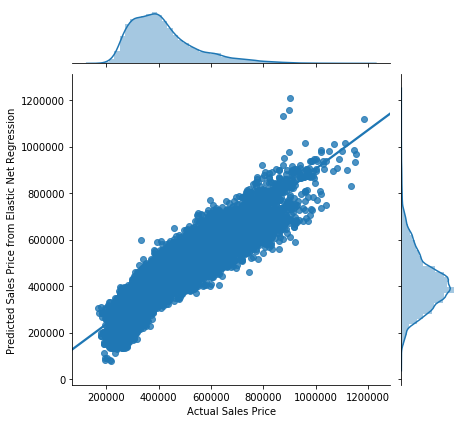

In [13]:
#predicting y values based on test set
y_pred_enet = enmodel.predict(Xs_test)
sns.jointplot(y_test,y_pred_enet, kind='reg').set_axis_labels('Actual Sales Price', 'Predicted Sales Price from Elastic Net Regression')

Text(0.5,1,'Top absolute coefficients - Highest impact on predicted prices')

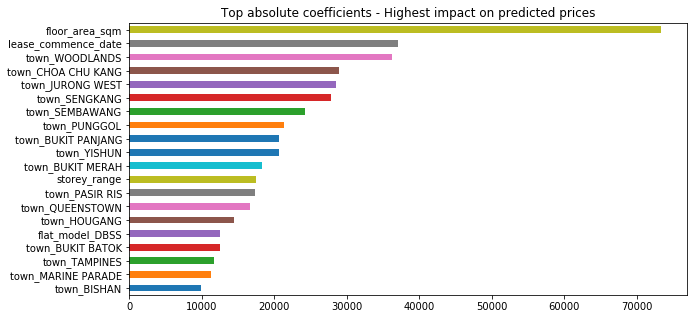

In [14]:
fig,ax = plt.subplots(figsize = (10,5))
impt_feat(enmodel.coef_, X_test).abs().sort_values().tail(20).plot.barh()
plt.title('Top absolute coefficients - Highest impact on predicted prices')

In [15]:
print("Best alpha:", enmodel.alpha_)
print("l1 Ratio chosen:", enmodel.l1_ratio_)
print("Intercept:", enmodel.intercept_)
score = enmodel.score(Xs_test, y_test)
print("R2 Score:", score)

Best alpha: 0.2762130062708075
l1 Ratio chosen: 1.0
Intercept: 418822.4347507183
R2 Score: 0.8379797701713851


### 4. Random Forest Regressor Model

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [18]:
rfr = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=28, n_jobs = 4)

In [19]:
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 36.1min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed: 77.4min finished


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [17]:
#Evaluating model with best parameters
rfr = RandomForestRegressor(n_estimators = 200, min_samples_leaf = 2, max_depth = 70, random_state = 28)
rfmodel = rfr.fit(X_train, y_train)
rfmodel.score(X_test, y_test)

0.9454216067419827

Text(0.5,1,'Top important features - Highest impact on predicted prices')

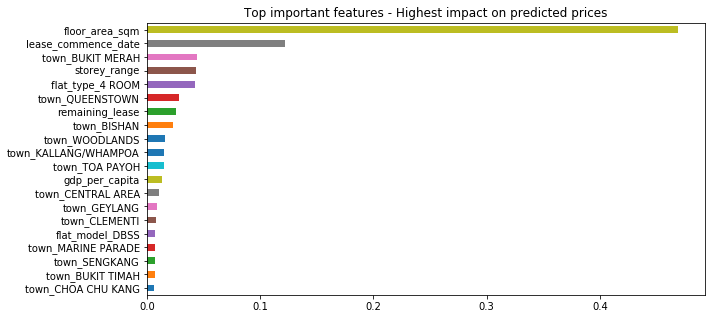

In [24]:
fig,ax = plt.subplots(figsize = (10,5))
impt_feat(rfmodel.feature_importances_, X_test).sort_values().tail(20).plot.barh()
plt.title('Top important features - Highest impact on predicted prices')

In [28]:
enet_top = impt_feat(enmodel.coef_, X_test).abs().sort_values(ascending=False).head(20).index
rf_top = impt_feat(rfmodel.feature_importances_, X_test).sort_values(ascending=False).head(20).index

In [31]:
#comparisons
compare_features = pd.DataFrame({'Ranking':range(1,21), 'Elastic Net': enet_top, 'Random Forest Regressor': rf_top })
compare_features

,Ranking,Elastic Net,Random Forest Regressor
0,1,floor_area_sqm,floor_area_sqm
1,2,lease_commence_date,lease_commence_date
2,3,town_WOODLANDS,town_BUKIT MERAH
3,4,town_CHOA CHU KANG,storey_range
4,5,town_JURONG WEST,flat_type_4 ROOM
5,6,town_SENGKANG,town_QUEENSTOWN
6,7,town_SEMBAWANG,remaining_lease
7,8,town_PUNGGOL,town_BISHAN
8,9,town_BUKIT PANJANG,town_WOODLANDS
9,10,town_YISHUN,town_KALLANG/WHAMPOA


In [34]:
#Common features agreed on by both models
common = []
for n in enet_top:
    if n in rf_top:
        common.append(n)
common

['floor_area_sqm',
 'lease_commence_date',
 'town_WOODLANDS',
 'town_CHOA CHU KANG',
 'town_SENGKANG',
 'town_BUKIT MERAH',
 'storey_range',
 'town_QUEENSTOWN',
 'flat_model_DBSS',
 'town_MARINE PARADE',
 'town_BISHAN']

In [35]:
#Unique features picked by each model not present in the other model
def find_unique(top_list):
    unique = []
    for n in top_list:
        if n not in common:
            unique.append(n)
    return unique

In [36]:
find_unique(enet_top)

['town_JURONG WEST',
 'town_SEMBAWANG',
 'town_PUNGGOL',
 'town_BUKIT PANJANG',
 'town_YISHUN',
 'town_PASIR RIS',
 'town_HOUGANG',
 'town_BUKIT BATOK',
 'town_TAMPINES']

In [37]:
find_unique(rf_top)

['flat_type_4 ROOM',
 'remaining_lease',
 'town_KALLANG/WHAMPOA',
 'town_TOA PAYOH',
 'gdp_per_capita',
 'town_CENTRAL AREA',
 'town_GEYLANG',
 'town_CLEMENTI',
 'town_BUKIT TIMAH']

#### Insights:  
Both approaches yielded similar results, with the Random Forest Regressor achieving a higher R2 score on the test set at 94.5% compared to Elastic Net at 83.8%. Both agree that the most critical factors affecting house prices are floor area and lease commence date. Elastic Net model seems to favor different towns as having a higher impact on prices, while the Random Forest Regressor is able to pick up other factors like flat type, remaining_lease, and gdp per capita (the economic indicator).

### 4. Time Series Analysis and Predictions

In [32]:
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA, ARIMA

from sklearn.metrics import r2_score

In [33]:
#For time series analysis we'll look at the median prices of all flats in singapore over time
series = data.groupby(['date'])['resale_price'].median()

In [34]:
series = series.reset_index()
series['date'] = pd.to_datetime(series['date'])
series.set_index('date', inplace = True, drop=True)

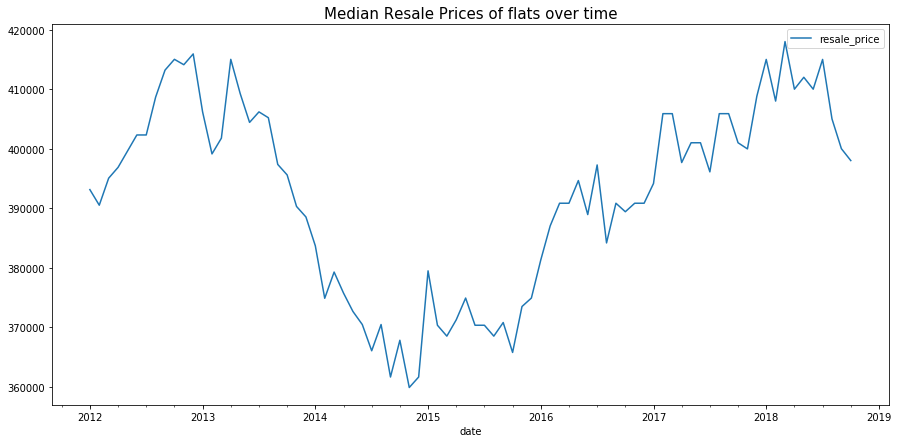

In [35]:
fig,ax = plt.subplots(figsize=(15,7))
series.plot.line(ax=ax)
plt.title('Median Resale Prices of flats over time', fontsize = 15)
plt.show()

<Figure size 432x288 with 0 Axes>

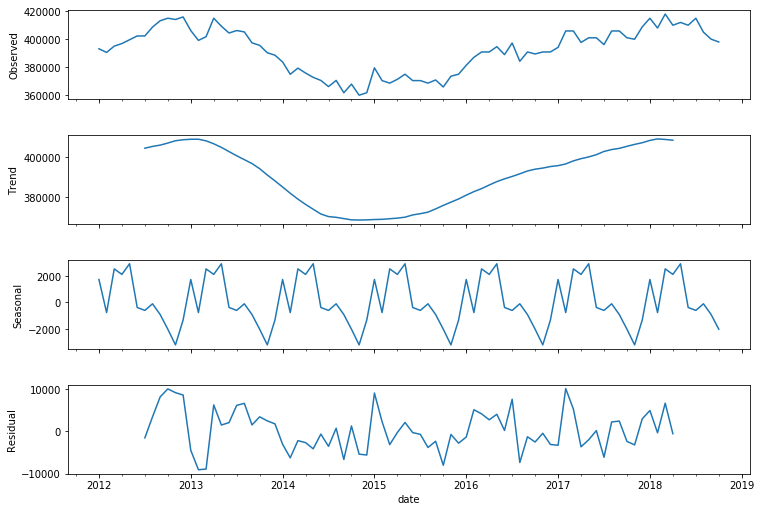

In [38]:
decomposition = seasonal_decompose(series['resale_price'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 8)

C:\Users\yitaris\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


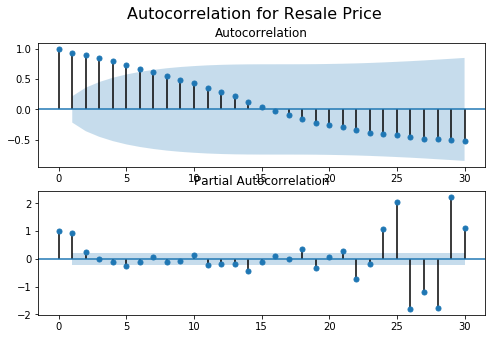

In [86]:
fig, ax = plt.subplots(nrows = 2, ncols =1, figsize=(8,5))
plot_acf(series['resale_price'], lags=30, ax=ax[0])
plot_pacf(series['resale_price'], lags=30, ax=ax[1])
plt.suptitle('Autocorrelation for Resale Price',fontsize = 16)
plt.show()

In [90]:
def test_stationarity(timeseries):

    # Determining rolling statistics:
    rolmean = timeseries.rolling(window=12, center=False).mean()
    rolstd = timeseries.rolling(window=12, center=False).std()

    # Plotting rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Performing a Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

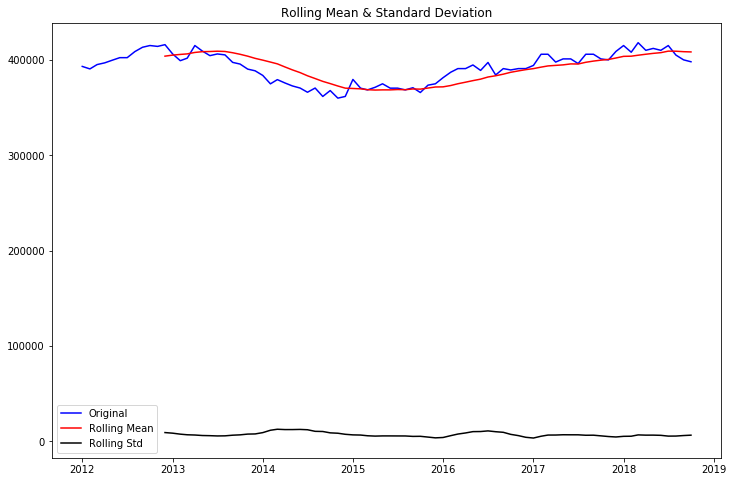

Results of Dickey-Fuller Test:
Test Statistic                 -1.283600
p-value                         0.636642
#Lags Used                      1.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64


In [92]:
test_stationarity(series['resale_price'])

#### Using ARIMA for forecasting

In [39]:
train = series[series.index.year<2017]
test = series[series.index.year>2016]

C:\Users\yitaris\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.resale_price   No. Observations:                   59
Model:                ARIMA(13, 1, 1)   Log Likelihood                -589.359
Method:                       css-mle   S.D. of innovations           5225.735
Date:                Wed, 19 Dec 2018   AIC                           1210.718
Time:                        07:19:22   BIC                           1243.958
Sample:                    02-01-2012   HQIC                          1223.693
                         - 12-01-2016                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   152.5532    939.901      0.162      0.872   -1689.619    1994.726
ar.L1.D.resale_price     -0.3523      0.591     -0.596      0.554      -1.511       0.807
ar.L2.D.

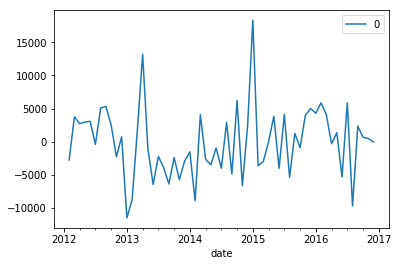

In [40]:
#Using ARIMA Model for forecast
model = ARIMA(train['resale_price'], (13,1,1))
results = model.fit()
print(results.summary())

#plot residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()

In [49]:
def plot_series(model,df,train,test,col):
    predictions = model.predict()
    full_pred = train[col].values[0]+np.cumsum(model.fittedvalues)
    
    #Graph
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(train.index[1:], full_pred, lw=2, color='grey', ls='dashed',label = 'in-sample prediction')
    ax.plot(df.index, df[col], lw=2, color='darkred')
    ax.plot(test.index, model.forecast(steps=len(test))[0], lw=2, color='blue',label = 'forecast')
    ax.plot(test.index, model.forecast(steps=len(test))[2], lw=2, color='blue', ls='dashed',label = 'forecast')
    plt.legend()
    plt.title('Resale Price predictions on 2017-2018')

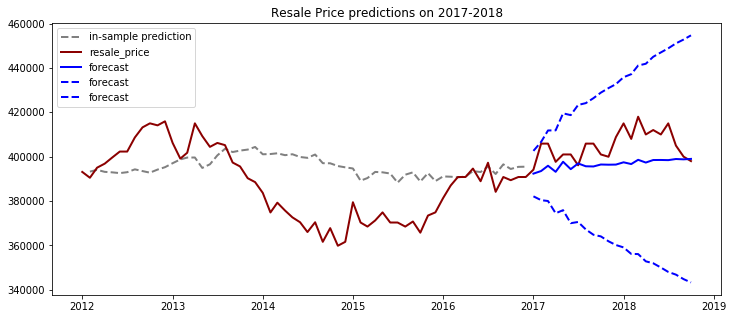

In [50]:
plot_series(results, series, train, test, 'resale_price')

#### Using LSTM for forecasting

In [149]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler

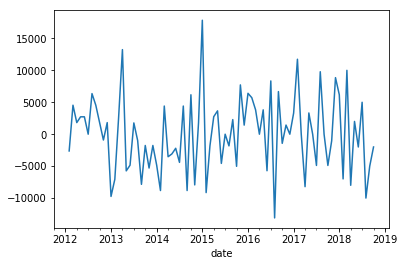

In [134]:
series['diff'] = series['resale_price'].diff(1)
series.dropna(inplace=True) #drops the first NaN value after differencing.

price = series[['diff']]
mms = MinMaxScaler(feature_range=(-1, 1))
price = mms.fit_transform(price)

series['diff'].plot()

In [138]:
#Splitting into 50% train-test split
train_size = int(len(price) * 0.50)
test_size = len(price) - train_size
print(len(price), train_size, test_size)

train, test = price[0:train_size,:], price[train_size:len(price),:]

81 40 41


In [144]:
def create_data(timeseries, lag=1, as_array=True):
    if not isinstance(timeseries, pd.Series):
        timeseries = pd.Series(timeseries.ravel())
    y = timeseries[lag:]
    X = pd.DataFrame({'lag'+str(lag-i):timeseries.shift(-i) for i in range(0, lag)}).dropna().iloc[:-1, :]
    if not as_array:
        return X, y
    else:
        return X.values, y.values

In [125]:
def lstm_prediction_plotter(model,trainX,testX,orig_data):
    model.reset_states()
    trainPredict = model.predict(trainX)
    model.reset_states()
    testPredict = model.predict(testX)
    model.reset_states()

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(orig_data)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(orig_data)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[-len(testPredict)-1:-1, :] = testPredict


    fig, ax = plt.subplots(ncols=1, nrows =2, figsize = (12,8))

    ax[0].plot(orig_data,label='original data')
    ax[0].plot(trainPredictPlot,label='in_sample prediction')
    ax[0].plot(testPredictPlot,label='out_sample prediction')
    ax[1].set_title('Graph of all data')
    ax[0].set_xticks([])
    ax[0].legend()

    ax[1].plot(orig_data[250:],label='original data')
    ax[1].plot(trainPredictPlot[250:],label='in_sample prediction')
    ax[1].plot(testPredictPlot[250:],label='out_sample prediction')
    ax[1].set_title('Zoom in to tested portion')
    ax[1].set_xticks([])
    ax[1].legend()
    plt.suptitle('Graph of prediction vs actual data', fontsize = 16);

In [126]:
def lstm_obtain_r2(model,trainX,testX,trainY,testY):
    model.reset_states()
    trainPredict = model.predict(trainX)
    model.reset_states()
    testPredict = model.predict(testX)
    model.reset_states()
    
    train_r2 = r2_score(trainY, trainPredict)
    print('train_r2',train_r2) 
    test_r2 = r2_score(testY[:-1], testPredict[1:])
    print('test_r2',test_r2)
    return [train_r2,test_r2]

In [145]:
lag = 1
trainX, trainY = create_data(train, lag)
testX, testY = create_data(test, lag)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [152]:
K.clear_session()

model = Sequential()
model.add(LSTM(4, input_shape=(None, lag)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
with tf.device('/cpu:0'):
    model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=1)
lstm_prediction_plotter(model,trainX,testX,mean_resale_px)
score = lstm_obtain_r2(model,trainX,testX,trainY,testY)
lstm_summary = add_lstm_score('mean_resale_px','1 layer| 4 nodes | optimizer = "adam"',score,[])

Epoch 1/20


InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version